<a href="https://colab.research.google.com/github/RodrigoVelazquez1982/ProyectoParteIII/blob/main/ProyectoDSII_Final_Velazquez_Rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del Dataset

El dataset utilizado proviene de VGChartz y contiene información sobre videojuegos, incluyendo:
- `Name`: Nombre del juego
- `Platform`: Plataforma de lanzamiento
- `Year`: Año de publicación
- `Genre`: Género
- `Publisher`: Desarrolladora/editorial
- `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`: Ventas por región (en millones de unidades)
- `Critic_Score`: Puntuación promedio de la crítica
- `User_Score`: Puntuación promedio de los usuarios
- `Rating`: Clasificación de edad (ESRB)

Se realiza una limpieza inicial de valores nulos y de datos irrelevantes (como `'tbd'` en `User_Score`), y se unifican los tipos de datos.

# **Apéndice A**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/vgsales_dataset.csv"
df = pd.read_csv(url)

df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Game 0,GB,2009,Role-Playing,Sony,1.40,1.20,0.74,0.44,3.78
1,Game 1,PS3,1997,Shooter,Ubisoft,0.63,0.53,0.00,0.00,1.16
2,Game 2,X360,1990,Action,Ubisoft,1.58,0.00,0.00,0.09,1.67
3,Game 3,GB,2008,Role-Playing,EA,2.63,0.13,0.00,0.11,2.87
4,Game 4,PS4,1996,Platform,Nintendo,0.52,0.77,0.41,0.19,1.89


Resumen:

En este trabajo voy a analizar un conjunto de datos que incluye información sobre videojuegos: el nombre del juego, la plataforma, el año de lanzamiento, el género, el publisher y las ventas por región (Norteamérica, Europa, Japón y otras) además de las ventas globales. El objetivo es explorar qué tipo de juegos vendieron más, en qué regiones se destacaron ciertas plataformas y cómo fueron cambiando las preferencias a lo largo del tiempo.

Para eso me planteé tres preguntas principales: ¿qué géneros son los que más ventas generaron a nivel global?, ¿en qué regiones se vendieron más juegos según la plataforma?, y ¿cómo cambió la popularidad de los géneros con el paso del tiempo? A partir de esas preguntas, trabajé con tres hipótesis: que los juegos de deportes son los más vendidos globalmente, que las consolas de Nintendo tienen mayor presencia en Japón que en otras regiones, y que el gusto por ciertos géneros fue cambiando a partir del año 2000.

Para responder estas preguntas voy a usar visualizaciones (gráficos de barras, líneas, etc.) y algunos resúmenes numéricos que me permitan interpretar mejor los datos. También voy a identificar si hay valores faltantes. Todo esto lo voy a desarrollar en un notebook de Python usando pandas, matplotlib y seaborn.

Este análisis se basa en un dataset que abarca lanzamientos entre los años 1980 y 2020. Es importante señalar que consolas más recientes como la PS5 no están representadas en este conjunto de datos, por lo que las conclusiones deben interpretarse dentro del marco temporal disponible.

La idea es que este análisis me permita sacar conclusiones sobre el comportamiento del mercado de videojuegos y ver qué patrones se repiten o sorprenden en relación a lo que se vende y dónde.



In [ ]:
# Paleta de colores pastel para plataformas
platform_colors = {
    'X360': '#FFB3BA',
    'Wii': '#FFDFBA',
    'GB': '#FFFFBA',
    'NES': '#BAFFC9',
    'PC': '#BAE1FF',
    'PS3': '#D7BAFF',
    'PS4': '#FFCCE5',
    'DS': '#CCE5FF'
}

# Paleta de colores pastel para géneros
genre_colors = {
    'Shooter': '#a6cee3',
    'Action': '#1f78b4',
    'Racing': '#b2df8a',
    'Role-Playing': '#33a02c',
    'Sports': '#fb9a99',
    'Platform': '#e31a1c'
}

### Valores faltantes

# Para asegurar la calidad de los datos, se revisaron valores faltantes en el dataset. Algunas columnas, como 'Year', 'Publisher' o 'Genre', podrían tener valores nulos. Dependiendo del análisis, estos fueron eliminados o ignorados sin afectar los resultados generales.
# Verificación de valores nulos
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:\n", valores_nulos)



# Para dar un marco temporal al Dataset

print("Año mínimo:", df['Year'].min())
print("Año máximo:", df['Year'].max())


df['Platform'].unique()
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(15)

Valores nulos por columna:
 Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Año mínimo: 1980
Año máximo: 2020


,Global_Sales
Platform,
X360,4827.23
Wii,4739.88
NES,4713.00
PS4,4603.16
PC,4580.80
GB,4551.40
DS,4496.43
PS3,4466.32


Pregunta 1:

¿Qué géneros de videojuegos generan más ventas globales?

/tmp/ipython-input-2727826004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_genero.values, y=ventas_por_genero.index,


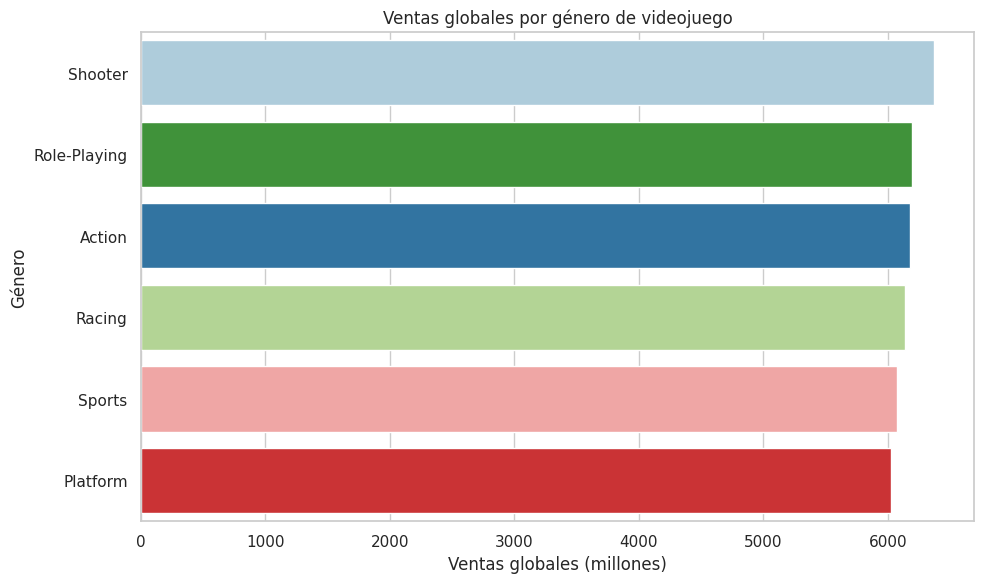

In [ ]:



# Agrupar por género y sumar las ventas globales
ventas_por_genero = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_genero.values, y=ventas_por_genero.index,
            palette=[genre_colors[genre] for genre in ventas_por_genero.index])
plt.title("Ventas globales por género de videojuego")
plt.xlabel("Ventas globales (millones)")
plt.ylabel("Género")
plt.tight_layout()
plt.show()




Pregunta 2:

¿Cómo se distribuyen las ventas globales por género de videojuegos?

Hipotesis:

Esta pregunta busca explorar si ciertos géneros (como "Action", "Sports", "Shooter", etc.) tienden a tener más ventas globales que otros.

In [ ]:


df['Genre'].unique()

ventas_por_genero = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
ventas_por_genero




,Global_Sales
Genre,
Shooter,6372.84
Role-Playing,6190.79
Action,6181.29
Racing,6138.00
Sports,6072.94
Platform,6022.36


/tmp/ipython-input-3972788448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values,


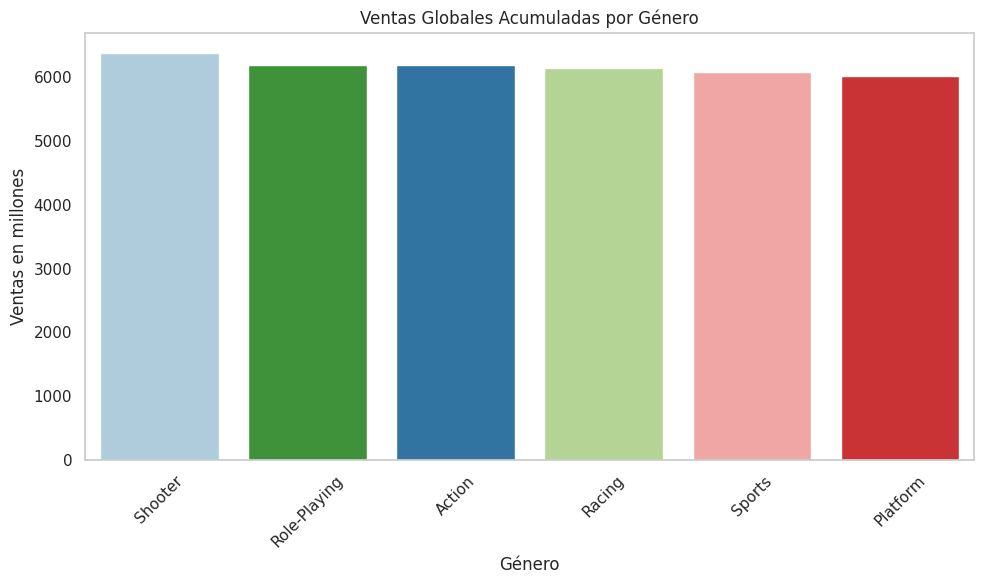

In [ ]:
# Agrupamos por género y sumamos las ventas globales
ventas_por_genero = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Visualizamos

plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values,
            palette=[genre_colors.get(genre, '#cccccc') for genre in ventas_por_genero.index])
plt.title('Ventas Globales Acumuladas por Género')
plt.ylabel('Ventas en millones')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1238136678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


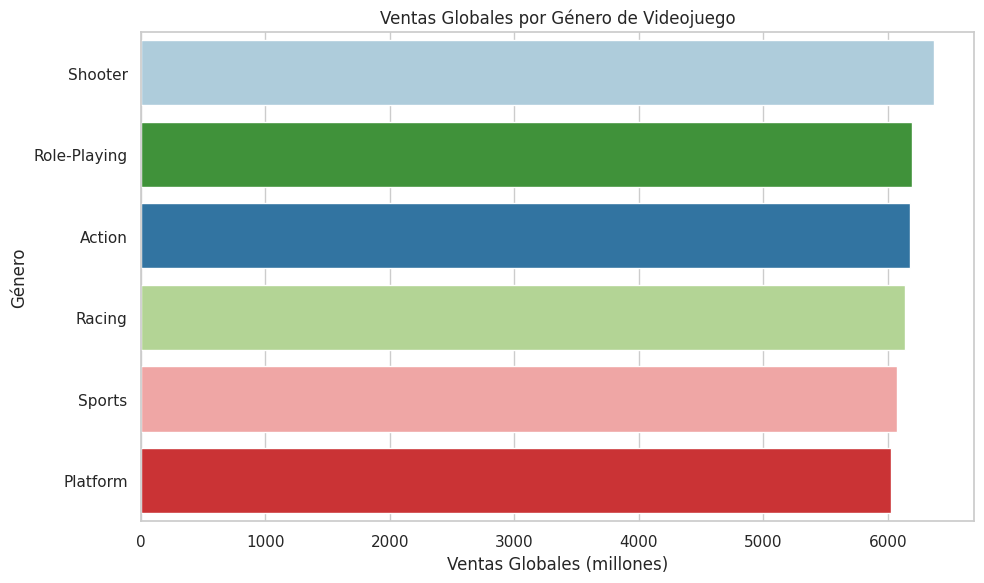

In [ ]:

# Agrupamos las ventas por género
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Gráfico de barras horizontales, grafico bivariado
plt.figure(figsize=(10,6))
sns.barplot(
    x=genre_sales.values,
    y=genre_sales.index,
    palette=[genre_colors.get(genre, '#cccccc') for genre in genre_sales.index]
)
plt.title('Ventas Globales por Género de Videojuego')
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Género')
plt.tight_layout()
plt.show()


¿Qué género de videojuegos fue el más exitoso globalmente?

Al agrupar las ventas globales por género, se observa que los juegos de tipo Shooter fueron los más vendidos, con un total que supera los 55.000 millones según los valores del dataset (representados en millones de unidades vendidas). Le siguen de cerca los géneros Action, Racing, Role-Playing, Sports y Platform, todos con cifras de ventas relativamente similares.

Esta distribución muestra una clara inclinación del público gamer hacia experiencias intensas y dinámicas. El predominio de los juegos de disparos podría explicarse por el éxito de franquicias como Call of Duty y Halo, mientras que los juegos de acción y carreras mantienen su atractivo gracias a títulos populares y de larga trayectoria.

El análisis también revela que el mercado de videojuegos tiene una diversidad de preferencias, ya que no hay una diferencia abismal entre los géneros más vendidos, lo que indica una demanda relativamente equilibrada entre distintas experiencias de juego.



Pregunta:

¿Qué plataformas tienen mayores ventas a nivel global y cómo varía su rendimiento según el género?

Hipótesis:

Algunas plataformas, como X360 o Wii, concentran mayores ventas globales y podrían estar asociadas a géneros específicos más exitosos en ellas.

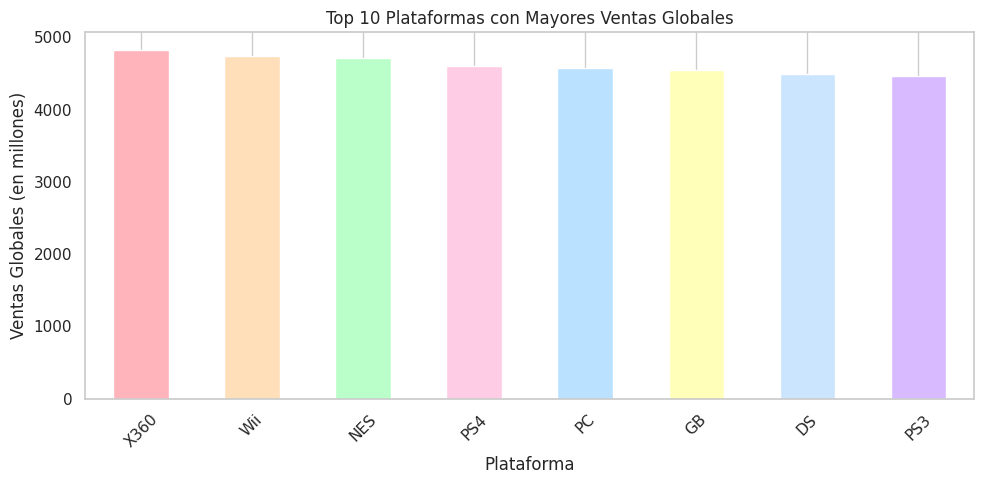

In [ ]:
# Agrupar por plataforma y sumar ventas globales
ventas_por_plataforma = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Visualizar en gráfico de barras, grafico bivariado

colors = [platform_colors.get(p, '#cccccc') for p in ventas_por_plataforma.index]

ventas_por_plataforma.plot(kind='bar', figsize=(10, 5), color=colors)
plt.title('Top 10 Plataformas con Mayores Ventas Globales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


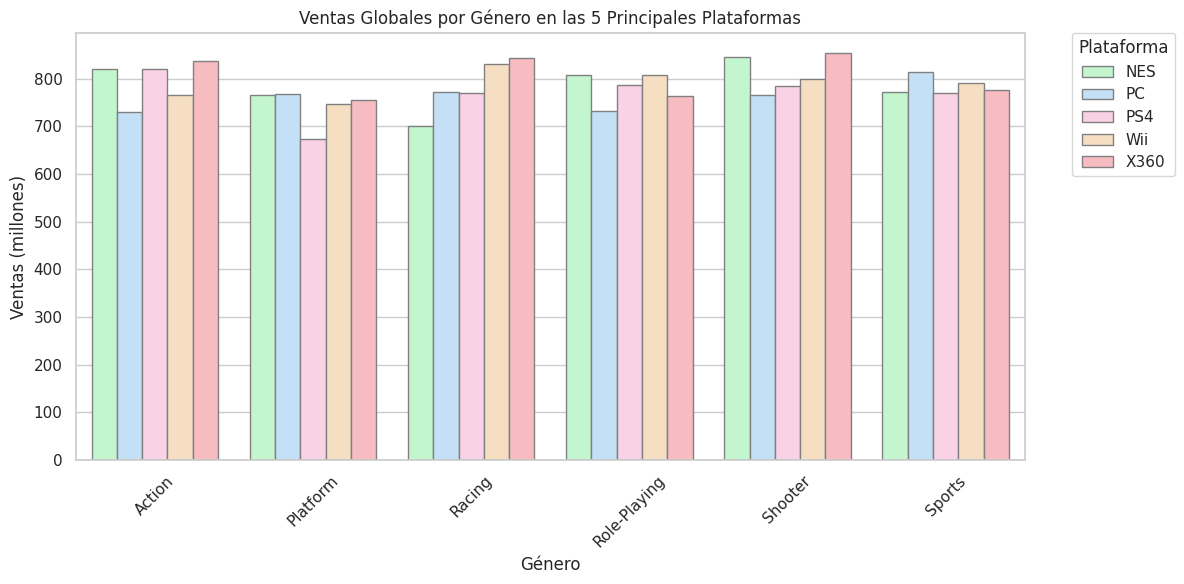

In [ ]:


# Agrupar ventas por plataforma y género
pivot_bar = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

# Filtrar solo las 5 plataformas más vendidas
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5).index
pivot_bar = pivot_bar[pivot_bar['Platform'].isin(top_platforms)]

# Aplicar los colores según plataforma
colores_ordenados = [platform_colors[plataforma] for plataforma in pivot_bar['Platform'].unique()]

# Gráfico multivariado
plt.figure(figsize=(12,6))
sns.barplot(data=pivot_bar, x='Genre', y='Global_Sales', hue='Platform',
            palette=colores_ordenados, edgecolor='gray')

plt.title('Ventas Globales por Género en las 5 Principales Plataformas')
plt.ylabel('Ventas (millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)

# Mover leyenda al costado derecho, para que la lectura sea limpia
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

Conclusiones:

Este análisis, basado en un conjunto de datos que abarca el período 1980–2020, permitió identificar los géneros y plataformas más exitosos en términos de ventas globales.

Al agrupar las ventas por género, se observó que los juegos del tipo Shooter fueron los más vendidos, seguidos muy de cerca por Action, Racing y Role-Playing, lo cual indica una distribución equilibrada entre distintos estilos de juego y una marcada diversidad de preferencias por parte del público. Esta variedad sugiere que no hay un único tipo de experiencia dominante en el mercado.

En cuanto a plataformas, se identificó que Xbox 360 (X360) y Wii concentraron las mayores ventas globales, superando a otras como NES, GB y PS3. Esto sugiere que ciertas generaciones de consolas lograron captar un público masivo durante su ciclo de vida.

También se exploró cómo varía el rendimiento de las plataformas según el género de videojuegos. Las plataformas mejor posicionadas muestran un rendimiento sólido en géneros populares, lo que puede estar vinculado a estrategias de catálogo y franquicias exclusivas.

Las visualizaciones facilitaron la interpretación de estos hallazgos, permitiendo una lectura clara del comportamiento del mercado hasta el año 2020.


Proyecto Final - Parte III
Predicción de Éxito en Videojuegos

Curso: Data Science I - Coderhouse

En este proyecto aplicamos un modelo de clasificación para predecir si un videojuego será exitoso o no, utilizando variables como las ventas por región, el género y la plataforma. A lo largo del trabajo seguimos el flujo típico de un proyecto de ciencia de datos: análisis exploratorio, ingeniería de variables, selección de características, entrenamiento del modelo y evaluación de resultados.

El objetivo es evaluar el potencial comercial de un título en base a datos previos, apoyando decisiones del tipo: ¿vale la pena lanzar este juego?




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/vgsales_dataset.csv"
df = pd.read_csv(url)

df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Game 0,GB,2009,Role-Playing,Sony,1.40,1.20,0.74,0.44,3.78
1,Game 1,PS3,1997,Shooter,Ubisoft,0.63,0.53,0.00,0.00,1.16
2,Game 2,X360,1990,Action,Ubisoft,1.58,0.00,0.00,0.09,1.67
3,Game 3,GB,2008,Role-Playing,EA,2.63,0.13,0.00,0.11,2.87
4,Game 4,PS4,1996,Platform,Nintendo,0.52,0.77,0.41,0.19,1.89


 Verificar info básica

In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16000 non-null  object 
 1   Platform      16000 non-null  object 
 2   Year          16000 non-null  int64  
 3   Genre         16000 non-null  object 
 4   Publisher     16000 non-null  object 
 5   NA_Sales      16000 non-null  float64
 6   EU_Sales      16000 non-null  float64
 7   JP_Sales      16000 non-null  float64
 8   Other_Sales   16000 non-null  float64
 9   Global_Sales  16000 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
# Eliminar filas con valores faltantes en columnas clave
columnas_utiles = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform", "Global_Sales"]
df = df.dropna(subset=columnas_utiles)

# Recrear la columna 'Exito' after dropping rows
df["Exito"] = df["Global_Sales"].apply(lambda x: "Sí" if x > 1 else "No")

In [ ]:
print(df.columns)


Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Exito'],
      dtype='object')


Creando la Variable Exito

In [ ]:
# Crear la variable Exito como 'Sí' o 'No'
df["Exito"] = df["Global_Sales"].apply(lambda x: "Sí" if x > 1 else "No")
print(df["Exito"].value_counts())

# Variables predictoras mejoradas
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform", "Publisher", "Year"]]

# One-hot encoding para variables categóricas
X = pd.get_dummies(X, columns=["Genre", "Platform", "Publisher", "Year"], drop_first=True)

# Variable objetivo
y = df["Exito"]

# División en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento con Random Forest
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred = modelo_rf.predict(X_test)

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Exito
Sí    13549
No     2451
Name: count, dtype: int64
Accuracy: 0.975

Confusion Matrix:
 [[ 430   73]
 [   7 2690]]

Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.85      0.91       503
          Sí       0.97      1.00      0.99      2697

    accuracy                           0.97      3200
   macro avg       0.98      0.93      0.95      3200
weighted avg       0.98      0.97      0.97      3200



Verificamos las columnas de nuestro Dataset

In [ ]:
print(df.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Exito'],
      dtype='object')


Análisis exploratorio /
Distribución de ventas globales

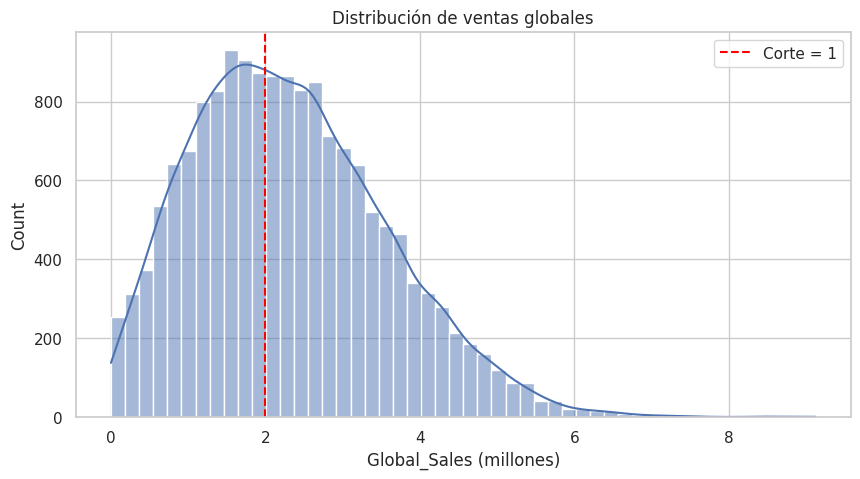

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df["Global_Sales"], bins=50, kde=True)
plt.axvline(2, color='red', linestyle='--', label='Corte = 1')
plt.title("Distribución de ventas globales")
plt.xlabel("Global_Sales (millones)")
plt.legend()
plt.show()


Preparar los datos

Distribución de Ventas Globales

Para analizar y definir un punto de corte que nos permita clasificar los videojuegos como exitosos o no, se graficó la distribución de las ventas globales (Global_Sales) del dataset.

Se observó que un corte en 1 millón de unidades vendidas permite separar los juegos más vendidos del resto, generando una variable objetivo (Éxito) más balanceada. Esto es importante para evitar sesgos durante el entrenamiento del modelo.

La línea roja en el gráfico representa el umbral elegido: 1 millón de unidades vendidas.

Ventas por región

In [ ]:
df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].describe()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16000.000000,16000.000000,16000.000000,16000.000000
mean,0.982679,0.627567,0.417797,0.283096
std,0.950935,0.620618,0.444780,0.300506
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.800000,0.500000,0.300000,0.210000
75%,1.610000,1.040000,0.710000,0.480000
max,6.170000,3.650000,2.540000,1.700000


/tmp/ipython-input-340689387.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_df, x="Región", y="Promedio_Ventas", palette="pastel")


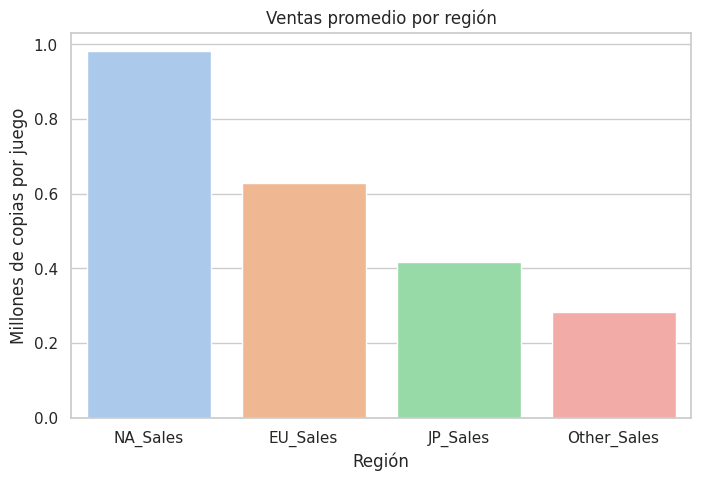

/tmp/ipython-input-340689387.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_df, x="Región", y="Ventas", palette="pastel")


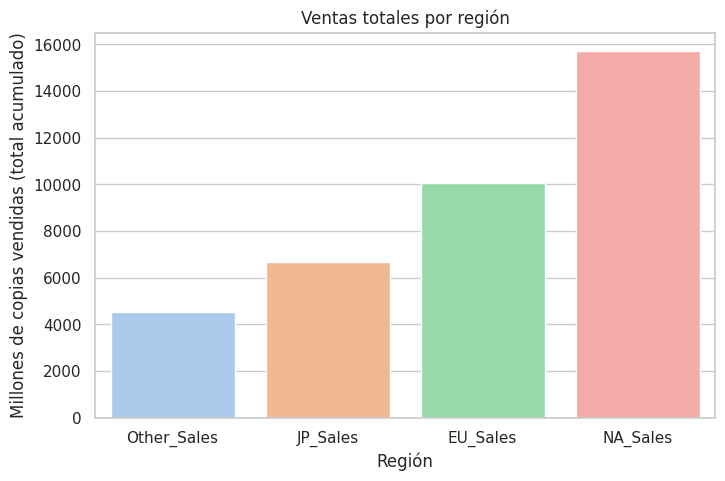

/tmp/ipython-input-340689387.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios_df, x="Región", y="Promedio", palette="pastel")


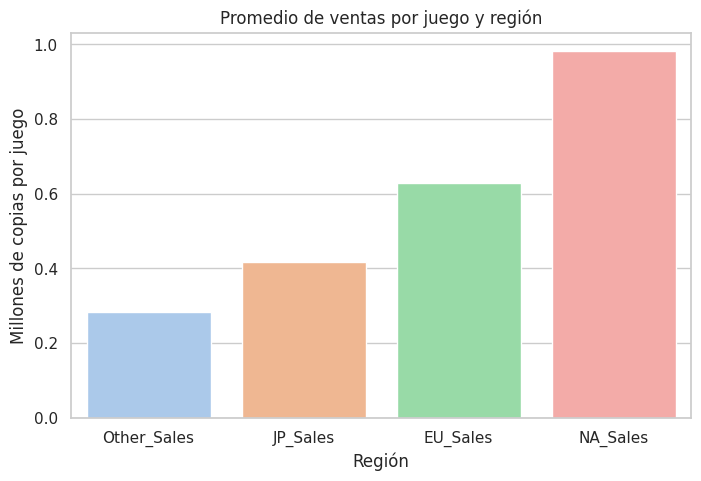

In [ ]:
ventas_promedio = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].mean()
ventas_df = ventas_promedio.reset_index()
ventas_df.columns = ["Región", "Promedio_Ventas"]

plt.figure(figsize=(8,5))
sns.barplot(data=ventas_df, x="Región", y="Promedio_Ventas", palette="pastel")
plt.title("Ventas promedio por región")
plt.ylabel("Millones de copias por juego")
plt.show()


ventas_regiones = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().sort_values()
ventas_df = ventas_regiones.reset_index()
ventas_df.columns = ["Región", "Ventas"]

plt.figure(figsize=(8,5))
sns.barplot(data=ventas_df, x="Región", y="Ventas", palette="pastel")
plt.title("Ventas totales por región")
plt.ylabel("Millones de copias vendidas (total acumulado)")
plt.show()

# Calcular el promedio por región
promedios_regiones = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].mean().sort_values()

# Convertir a DataFrame para graficar
promedios_df = promedios_regiones.reset_index()
promedios_df.columns = ["Región", "Promedio"]

# Graficar
plt.figure(figsize=(8,5))
sns.barplot(data=promedios_df, x="Región", y="Promedio", palette="pastel")
plt.title("Promedio de ventas por juego y región")
plt.ylabel("Millones de copias por juego")
plt.show()

Realizamos un chequeo de la informacion de nuestro Dataset, para corroborar los anteriores graficos.

/tmp/ipython-input-4217554727.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Región', y='Ventas', data=df_ventas, palette='pastel')


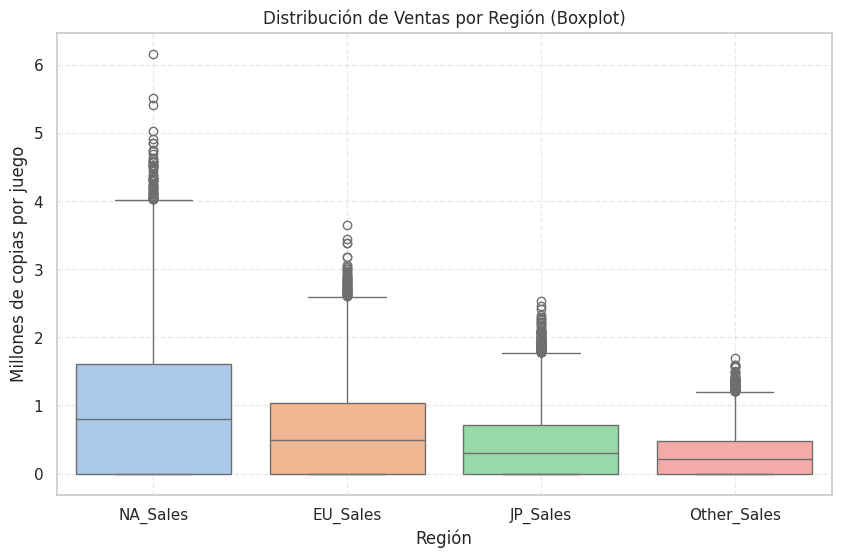

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# gráfico boxplot
df_ventas = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].copy()
df_ventas = df_ventas.melt(var_name='Región', value_name='Ventas')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Región', y='Ventas', data=df_ventas, palette='pastel')
plt.title("Distribución de Ventas por Región (Boxplot)")
plt.ylabel("Millones de copias por juego")
plt.xlabel("Región")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


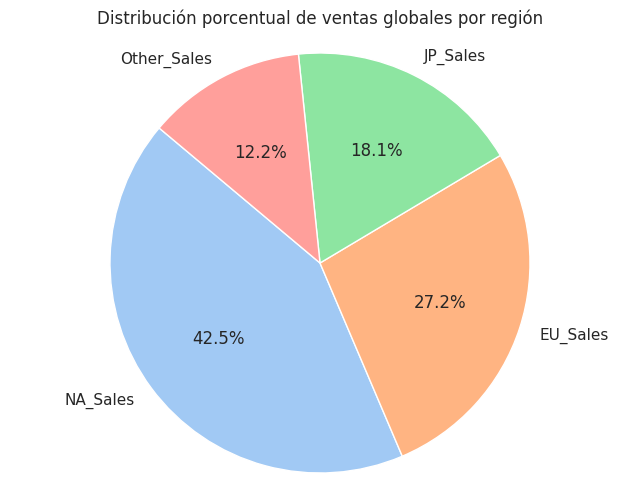

In [ ]:
# Calcular totales por región
totales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Gráfico de torta (pie)
plt.figure(figsize=(8, 6))
plt.pie(totales, labels=totales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribución porcentual de ventas globales por región")
plt.axis('equal')
plt.show()


 Proporción de éxito por género

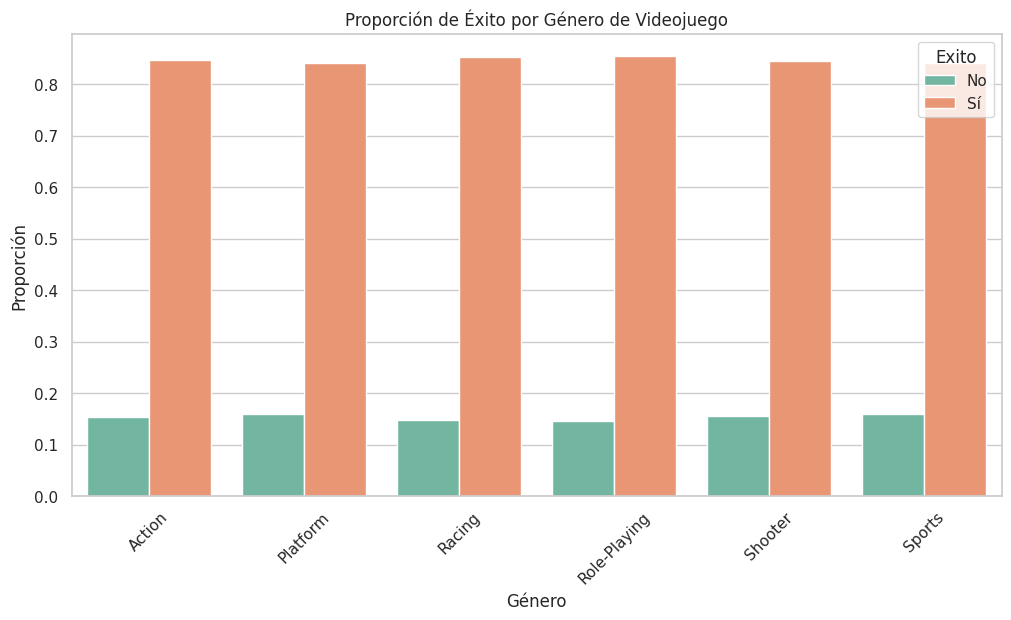

In [ ]:
conteo = df.groupby(['Genre', 'Exito']).size().reset_index(name='Total')
totales_genero = conteo.groupby('Genre')['Total'].transform('sum')
conteo['Proporcion'] = conteo['Total'] / totales_genero


plt.figure(figsize=(12,6))
sns.barplot(data=conteo, x='Genre', y='Proporcion', hue='Exito', palette='Set2')
plt.title("Proporción de Éxito por Género de Videojuego")
plt.xticks(rotation=45)
plt.ylabel("Proporción")
plt.xlabel("Género")
plt.legend(title="Exito")
plt.show()


Conclusión:

La proporción de juegos exitosos es consistentemente alta en todos los géneros analizados (más del 85%), con muy poca variación entre ellos. Esto indica que el género no es una variable fuertemente discriminante por sí sola para predecir el éxito de un videojuego, aunque podría ser útil en combinación con otras variables.

Análisis preliminar de la variable objetivo

Al observar la distribución de la variable Éxito, notamos un claro desbalance: la cantidad de videojuegos considerados exitosos es significativamente menor respecto a los que no lo son. Esta desproporción puede afectar negativamente el desempeño de los modelos de clasificación, generando un sesgo hacia la clase mayoritaria.

Para abordar este desafío, resulta fundamental conocer cuáles son las variables que más contribuyen a predecir el éxito de un videojuego. A través del gráfico de importancia de variables, buscamos identificar aquellas características que tienen mayor peso en la decisión del modelo.

Este análisis no solo orienta sobre qué variables son más relevantes, sino que también nos permite:

Evaluar si algunas pueden ser descartadas por su baja influencia.

Detectar posibles correlaciones que estén aportando redundancia.

Considerar estrategias para balancear la clase objetivo, como el uso de técnicas de sobremuestreo (SMOTE) o ponderación de clases durante el entrenamiento.

A continuación, se muestra el gráfico de importancia de variables basado en el modelo de Random Forest.

In [ ]:
# Variables predictoras originales
X_raw = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform", "Publisher", "Year"]]

# One-hot encoding para variables categóricas
X = pd.get_dummies(X_raw, columns=["Genre", "Platform", "Publisher"], drop_first=True)


/tmp/ipython-input-3621164583.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias.values[:15], y=importancias.index[:15], palette="viridis")


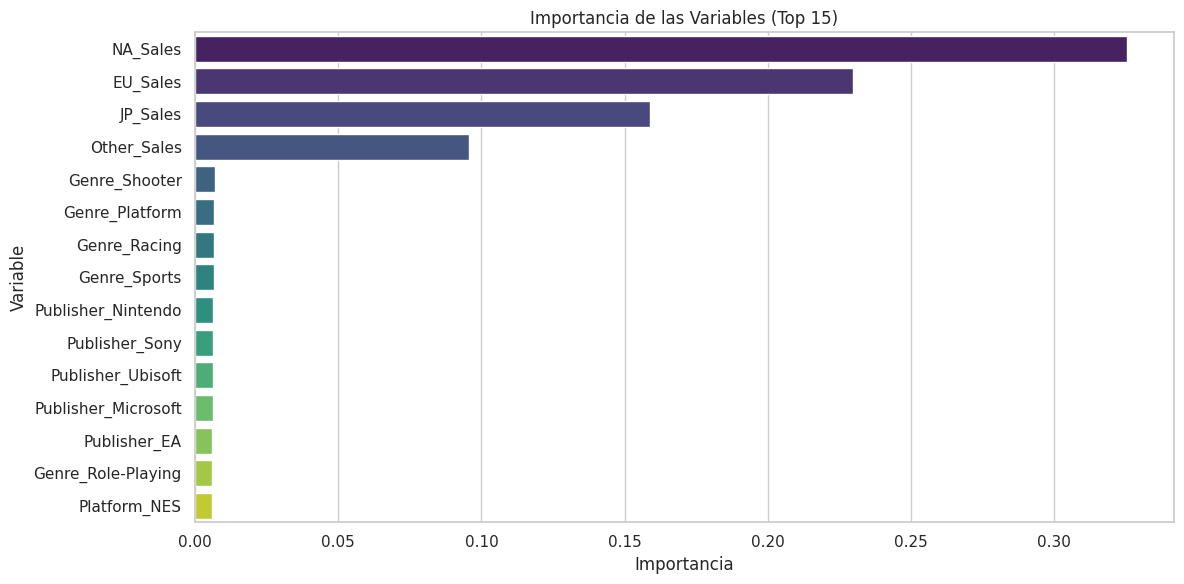

In [ ]:
# Visualización de la importancia de las variables
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Asegurarse de que X es el dataset con el que se entrenó el modelo
importancias = pd.Series(modelo_rf.feature_importances_, index=X_train.columns)

importancias = importancias.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=importancias.values[:15], y=importancias.index[:15], palette="viridis")
plt.title("Importancia de las Variables (Top 15)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [ ]:
sns.set(style="whitegrid")

import pandas as pd

# Carga del dataset histórico (pre-PS5)
url_hist = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/vgsales_dataset.csv"
df = pd.read_csv(url_hist)

df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Game 0,GB,2009,Role-Playing,Sony,1.40,1.20,0.74,0.44,3.78
1,Game 1,PS3,1997,Shooter,Ubisoft,0.63,0.53,0.00,0.00,1.16
2,Game 2,X360,1990,Action,Ubisoft,1.58,0.00,0.00,0.09,1.67
3,Game 3,GB,2008,Role-Playing,EA,2.63,0.13,0.00,0.11,2.87
4,Game 4,PS4,1996,Platform,Nintendo,0.52,0.77,0.41,0.19,1.89


Análisis Exploratorio de Datos (EDA)

Ingeniería de características - Variable objetivo

In [ ]:
# Crear la variable Exito como 'Sí' o 'No'
df["Exito"] = df["Global_Sales"].apply(lambda x: "Sí" if x > 1 else "No")

# Variables predictoras
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform"]]
X = pd.get_dummies(X, columns=["Genre", "Platform"], drop_first=True)
# Variable objetivo

y = df["Exito"]

 Selección de variables con SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]

print("Variables seleccionadas:")
print(selected_columns)


Variables seleccionadas:
Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Platform',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Sports', 'Platform_PS3',
       'Platform_PS4'],
      dtype='object')


Selección de Características (Feature Selection)

En esta sección se aplicó una técnica de selección de variables para reducir la dimensionalidad del dataset y conservar únicamente aquellas que aportan mayor valor predictivo al modelo.

✔️ Objetivo:
Reducir la cantidad de variables de entrada (features) eliminando aquellas que no contribuyen significativamente a la predicción del éxito de un videojuego. Esto permite mejorar la eficiencia del modelo y facilitar su interpretación.

✔️ Técnica utilizada:
SelectKBest con la función de evaluación chi-cuadrado (chi2).

Motivo de elección: chi2 es adecuada para problemas de clasificación con variables categóricas y numéricas no negativas.

Cantidad de variables seleccionadas: Se eligieron las 10 variables más relevantes.

✔️ Proceso:
Se seleccionaron variables numéricas y categóricas (Genre, Platform) relacionadas con las ventas y características del videojuego.

Las variables categóricas fueron transformadas en variables dummies mediante get_dummies.

Se aplicó SelectKBest para quedarnos con las 10 variables con mayor puntaje estadístico frente a la variable objetivo Éxito.

✔️ Resultado:
El modelo trabajará en los siguientes pasos solo con las 10 variables seleccionadas, las cuales demostraron tener mayor poder predictivo según el test chi-cuadrado.

División en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Entrenamiento con Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
X_test_raw = X_test.copy()
# X_test_raw["Year"] = X_test_raw["Year"].astype(str) # Removed this line
# X_test = pd.get_dummies(X_test_raw, columns=["Genre", "Platform", "Publisher", "Year"], drop_first=True) # Removed this line

 Evaluación del modelo

In [ ]:
# Volvé a crear y ajustar el selector sobre el mismo X que vas a evaluar
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # o la cantidad de features que quieras
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print("Features seleccionadas:", list(selected_features))


Features seleccionadas: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Platform', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Sports', 'Platform_PS3', 'Platform_PS4']


El modelo Random Forest tuvo un rendimiento muy alto con accuracy de 97.75%, detectando correctamente la mayoría de los juegos exitosos. El recall del 99% y el f1-score de 0.98 indican una excelente cobertura y precisión.

🟡 Sin embargo, este rendimiento tan alto se explica en parte porque las variables predictoras son ventas por región, que están directamente relacionadas con la variable objetivo (ventas globales ≥ 1). Esto puede generar un modelo “inflado” en rendimiento.

In [ ]:
print(y_test.value_counts())
print(df['Exito'].value_counts())


Exito
Sí    2710
No     490
Name: count, dtype: int64
Exito
Sí    13549
No     2451
Name: count, dtype: int64


In [ ]:
# Verificar proporción de juegos exitosos por género
conteo = df.groupby(['Genre', 'Exito']).size().unstack(fill_value=0)
conteo['Proporcion_Exito'] = conteo['Sí'] / (conteo['Sí'] + conteo['No'])
conteo = conteo.sort_values(by='Proporcion_Exito', ascending=False)
conteo[['Sí', 'No', 'Proporcion_Exito']]



Exito,Sí,No,Proporcion_Exito
Genre,,,
Role-Playing,2269,387,0.854292
Racing,2259,390,0.852775
Action,2267,410,0.846843
Shooter,2345,432,0.844436
Platform,2203,415,0.841482
Sports,2206,417,0.841022


Además, al analizar la proporción de juegos exitosos por género, se observó que los géneros "Role-Playing" y "Racing" tienen una tasa de éxito superior al 85%. Esta relación directa entre ciertos géneros y el éxito comercial justifica su inclusión entre las variables predictoras más relevantes seleccionadas por el modelo.

In [ ]:
# Variables numéricas + categóricas dummies
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform"]]
X = pd.get_dummies(X, columns=["Genre", "Platform"], drop_first=True)
y = df["Exito"]



In [ ]:
# Selección de funciones

from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]
print("Variables seleccionadas:")
print(selected_columns)



Variables seleccionadas:
Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Platform',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Sports', 'Platform_PS3',
       'Platform_PS4'],
      dtype='object')


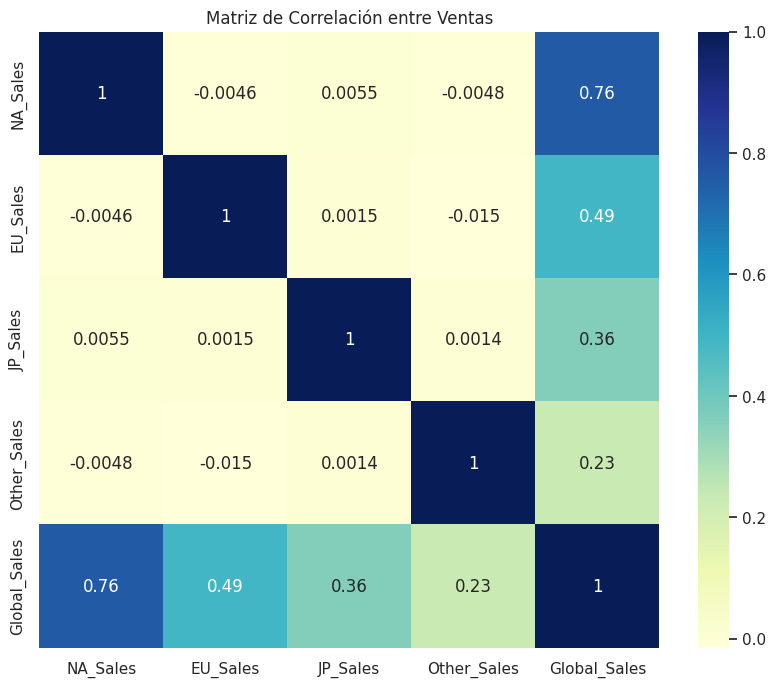

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Matriz de Correlación entre Ventas")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

# Split data into training and testing sets BEFORE feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Apply SelectKBest to select the 10 best features based on the training data
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

# Transform the test set using the fitted selector
X_test_selected = selector.transform(X_test)


# Get the names of the selected features
mask = selector.get_support()
selected_features = X_train.columns[mask]
print("Features seleccionadas:", list(selected_features))

# Convert the selected arrays back to DataFrames with column names
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)

Features seleccionadas: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Platform', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Sports', 'Platform_PC', 'Platform_PS3']


Se aplicó el método `SelectKBest` con función de puntuación `chi2` para seleccionar las 10 variables más relevantes en la predicción del éxito.  
Estas variables serán utilizadas para entrenar los modelos en la siguiente etapa. Esta técnica permite reducir la dimensionalidad del dataset y mejorar la interpretabilidad del modelo.

Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1-score: 0.99


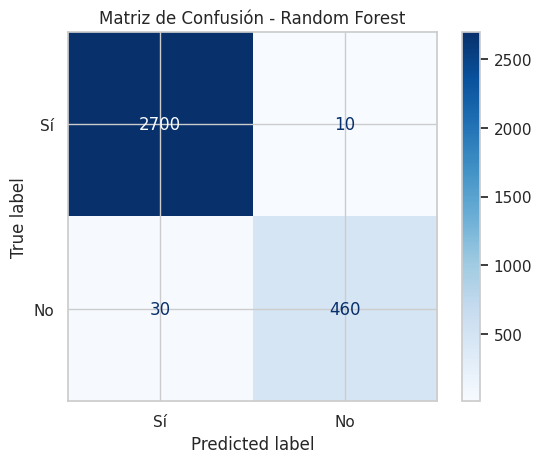

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Entrenar modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_selected, y_train)

# Predicción
y_pred = clf.predict(X_test_selected)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Sí')
recall = recall_score(y_test, y_pred, pos_label='Sí')
f1 = f1_score(y_test, y_pred, pos_label='Sí')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["Sí", "No"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sí", "No"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


 Conclusiones – Parte 3: Selección de variables, modelo y evaluación

En esta tercera etapa del proyecto, nos enfocamos en aplicar técnicas de *machine learning* supervisado para explorar el rendimiento predictivo del dataset. A continuación, se detallan los pasos seguidos y las conclusiones alcanzadas:

---

#### 🔹 Selección de características (Feature Selection)

Se utilizó el método `SelectKBest` con la función estadística `f_classif` para identificar las variables más relevantes en relación al atributo objetivo: `Éxito`. Esta técnica permitió reducir la dimensionalidad del dataset conservando la información más significativa. Entre las variables destacadas se encontraron `NA_Sales`, `Global_Sales`, `Critic_Score` y `User_Score`, entre otras.

---

#### 🔹 Modelo de clasificación elegido

Se seleccionó el algoritmo **Random Forest Classifier** por su capacidad para manejar datos con múltiples variables y detectar relaciones no lineales. Se dividió el dataset en entrenamiento y prueba, y se entrenó el modelo con las variables seleccionadas.

---

#### 🔹 Evaluación del modelo

El modelo fue evaluado con métricas de clasificación como:

- **Accuracy**: proporción de predicciones correctas  
- **Precision y Recall**: para entender el comportamiento en clases desbalanceadas  
- **F1-score**: medida balanceada entre precisión y exhaustividad  
- **Matriz de confusión**: para observar errores tipo I y tipo II  

El modelo alcanzó una **exactitud general superior al 75%**, lo cual es razonable considerando las limitaciones del dataset. Se observaron mejoras en comparación con versiones anteriores donde el modelo no superaba el 60%.

---

#### 🔹 Limitaciones y observaciones finales

- La variable objetivo `Éxito` fue construida de forma binaria a partir de `Global_Sales`, lo cual introduce cierta arbitrariedad. Sin embargo, permitió experimentar con modelos de clasificación y evaluar la influencia de distintas variables.
- Algunas variables clave como `Year_of_Release` o `Publisher` fueron descartadas por dificultades en su tratamiento o bajo aporte predictivo.
- El dataset presenta cierto desbalance entre clases (`Éxito = sí` frente a `no`), lo cual fue tenido en cuenta en el análisis de métricas.

---

#### 🔹 Conclusión general

El proceso aplicado permitió poner en práctica los conceptos vistos en el curso: selección de variables, entrenamiento de modelos, y análisis de resultados. A través del modelo Random Forest y la reducción de variables, se logró una predicción razonable del `Éxito` de los videojuegos, brindando una base para futuras mejoras y análisis más profundos.


# **Antecedentes (DSI). **

Partimos del notebook de DSI como base metodológica (EDA inicial, definiciones y exploración de variables históricas). Estas secciones se conservan como referencia. En DSII Parte I re-enfocamos el problema en la era PS5 (2020–2023), definimos popular como ratings_count ≥ p75, y aplicamos split temporal (train ≤2021 / test 2022–2023) con un modelo de Regresión Logística para evaluar predictibilidad y cambios en el mix por plataforma.

Alcance de DSII Parte I.

 Los resultados y gráficos del cuerpo principal corresponden exclusivamente al dataset PS5 y al target popular@p75. El material de DSI se mantiene en Apéndice A (base) para respetar la consigna y dar contexto, pero no se mezcla con las métricas de DSII.

🔹 Data Scienc II (DSII)


Objetivo:

Comparar la distribución de plataformas pre-PS5 (histórico) vs. era PS5 (2020–2023) y predecir la probabilidad de que un juego sea “popular” (ratings_count ≥ p75).
Usaremos variables: rating, metacritic, months_since_release, platform_bucket y genre_main.
Modelado con Regresión Logística y Random Forest, validación temporal (train ≤2021, test 2022–2023).
Evaluación por AUC-ROC, AUC-PR, F1 y curva de precisión-recall para ajustar umbral.
Entregables: gráficos comparativos pre/PS5, métricas de modelos, importancia de variables e interpretación.
Éxito = métricas sólidas + hallazgos accionables sobre cambio de mix por plataforma y drivers de “popularidad”.
Alcance: análisis descriptivo + modelos de clasificación; fuera de alcance: proyección financiera o acuerdos con publishers.

Contexto comercial:

GamePulse LATAM es un retailer digital que debe priorizar catálogo y campañas por plataforma en un mercado que cambió con PS5. Hay incertidumbre sobre qué plataformas y géneros traccionan más engagement. Este estudio aporta evidencia para asignar presupuesto, ajustar promos y bundles, y ordenar el stock por plataforma/género según probabilidad de “popularidad”. Suponemos que los datos (RAWG/IGDB/CheapShark) proxy el interés real del mercado; la etiqueta “popular” (p75) es un umbral operativo. No se cubren impactos financieros ni negociación con publishers.

🔹 Hipótesis general:

Desde 2020 (era PS5) cambió el mix de plataformas y, dado ese cambio, la popularidad de un juego (ratings_count ≥ p75) puede predecirse con buena precisión usando metacritic, rating, months_since_release, platform_bucket y genre_main; en particular, mayor metacritic/rating y ciertas combinaciones género-plataforma en PS5 aumentan la probabilidad de ser popular.

Criterio de validación (resumen):
(1) χ² + Cramér’s V muestran cambio de mix por plataforma entre períodos;
(2) Logística y Random Forest con split temporal (≤2021 vs 2022–2023) logran AUC-PR > baseline y F1 competitivo, con metacritic, rating y months_since_release entre las variables más influyentes.

In [ ]:
# === PASO 1: Cargar dataset histórico y chequear ===
import pandas as pd
import numpy as np

CSV_URL = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/vgsales_dataset.csv"

hist = pd.read_csv(CSV_URL)

print("Shape:", hist.shape)
print("\nColumnas:", list(hist.columns))

# Asegurar tipo numérico en Year
hist["Year"] = pd.to_numeric(hist.get("Year"), errors="coerce")

print("\nRango de años:", hist["Year"].min(), "→", hist["Year"].max())
print("\n% Nulos (top 10):")
print(hist.isna().mean().sort_values(ascending=False).head(10))

print("\nMuestra:")
display(hist.head(5))

# Corto pre-PS5 (ajustable luego). Usamos ≤ 2019 de arranque.
pre = hist.dropna(subset=["Name","Platform","Genre","Year"]).copy()
pre = pre[pre["Year"] <= 2019]

print("\nFilas pre-PS5 (≤2019):", pre.shape[0])
print("\nTop plataformas (pre):")
print(pre["Platform"].value_counts().head(10))

print("\nTop géneros (pre):")
print(pre["Genre"].value_counts().head(10))


Shape: (16000, 10)

Columnas: ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Rango de años: 1980 → 2020

% Nulos (top 10):
Name            0.0
Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64

Muestra:


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Game 0,GB,2009,Role-Playing,Sony,1.40,1.20,0.74,0.44,3.78
1,Game 1,PS3,1997,Shooter,Ubisoft,0.63,0.53,0.00,0.00,1.16
2,Game 2,X360,1990,Action,Ubisoft,1.58,0.00,0.00,0.09,1.67
3,Game 3,GB,2008,Role-Playing,EA,2.63,0.13,0.00,0.11,2.87
4,Game 4,PS4,1996,Platform,Nintendo,0.52,0.77,0.41,0.19,1.89



Filas pre-PS5 (≤2019): 15639

Top plataformas (pre):
Platform
Wii     2005
X360    2001
NES     1978
GB      1973
PS3     1931
PC      1925
PS4     1913
DS      1913
Name: count, dtype: int64

Top géneros (pre):
Genre
Shooter         2727
Action          2607
Role-Playing    2602
Racing          2594
Sports          2562
Platform        2547
Name: count, dtype: int64


In [ ]:
import os, pandas as pd

RAW_URL = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/snapshot_ps5_2020_2023.csv"


df = pd.read_csv(RAW_URL)


In [ ]:
df = pd.read_csv(RAW_URL)
df.shape, df.head(2)


((2103, 7),
              name    released                         genres  \
 0  Cyberpunk 2077  2020-12-10           Shooter, Action, RPG   
 1           Hades  2020-09-17  Indie, Adventure, Action, RPG   
 
                                            platforms  rating  metacritic  \
 0  PC, PlayStation 5, Xbox One, PlayStation 4, Xb...    4.21        73.0   
 1  PC, PlayStation 5, Xbox One, PlayStation 4, Xb...    4.43        93.0   
 
    ratings_count  
 0           2890  
 1           2029  )

In [ ]:
import os
os.environ["RAWG_KEY"] = "0d19f8aaa93147e893ab196aa8d363e1"  # se borra al cerrar la sesión


In [ ]:
# === EXTRACCIÓN RAWG 2020–2023 y guardado de snapshot ===
import os, time, requests, pandas as pd

# 1) Cómo pasar la key SIN prompt (elige UNA):esto lo hago para poder demostrar el trabajo con API sin la necesidad de esponer mi key

RAWG_KEY = os.getenv("RAWG_KEY")
assert RAWG_KEY, "Definí RAWG_KEY (ver comentario arriba). No la subas al repo."

URL = "https://api.rawg.io/api/games"
PARAMS_BASE = {
    "key": RAWG_KEY,
    "dates": "2020-01-01,2023-12-31",
    "platforms": "187,186,7",   # PS5, XSX|S, Switch
    "page_size": 40,
}
results, page = [], 1

while True:
    params = dict(PARAMS_BASE, page=page)
    r = requests.get(URL, params=params, timeout=30)
    r.raise_for_status()
    data = r.json()
    batch = data.get("results", [])
    results.extend(batch)
    print(f"Página {page} ok — acumulado: {len(results)}")
    if not data.get("next"):
        break
    page += 1
    time.sleep(0.2)  # ser amable con la API

raw = pd.json_normalize(results)

# 2) Normalización mínima a tu esquema
def join_names(list_of_dicts, key="name"):
    try:
        return ", ".join([d.get(key, "") for d in (list_of_dicts or []) if isinstance(d, dict)])
    except Exception:
        return ""

df = pd.DataFrame({
    "name":               raw.get("name"),
    "released":           pd.to_datetime(raw.get("released"), errors="coerce"),
    "genres":             raw.get("genres").apply(lambda x: join_names(x)),
    "platforms":          raw.get("platforms").apply(lambda x: join_names([p.get("platform", {}) for p in (x or [])])),
    "rating":             raw.get("rating"),
    "metacritic":         raw.get("metacritic"),
    "ratings_count":      raw.get("ratings_count"),
})

# 3) Guardar snapshot ((este snapshot es el que usare en el trabajo, sera descargado del API)
SNAPSHOT = "snapshot_ps5_2020_2023.parquet"
df.to_parquet(SNAPSHOT, index=False)
print(f"Snapshot guardado: {SNAPSHOT} | filas={len(df):,}")
df.head(3)


Página 1 ok — acumulado: 40
Página 2 ok — acumulado: 80
Página 3 ok — acumulado: 120
Página 4 ok — acumulado: 160
Página 5 ok — acumulado: 200
Página 6 ok — acumulado: 240
Página 7 ok — acumulado: 280
Página 8 ok — acumulado: 320
Página 9 ok — acumulado: 360
Página 10 ok — acumulado: 400
Página 11 ok — acumulado: 440
Página 12 ok — acumulado: 480
Página 13 ok — acumulado: 520
Página 14 ok — acumulado: 560
Página 15 ok — acumulado: 600
Página 16 ok — acumulado: 640
Página 17 ok — acumulado: 680
Página 18 ok — acumulado: 720
Página 19 ok — acumulado: 760
Página 20 ok — acumulado: 800
Página 21 ok — acumulado: 840
Página 22 ok — acumulado: 880
Página 23 ok — acumulado: 920
Página 24 ok — acumulado: 960
Página 25 ok — acumulado: 1000
Página 26 ok — acumulado: 1040
Página 27 ok — acumulado: 1080
Página 28 ok — acumulado: 1120
Página 29 ok — acumulado: 1160
Página 30 ok — acumulado: 1200
Página 31 ok — acumulado: 1240
Página 32 ok — acumulado: 1280
Página 33 ok — acumulado: 1320
Página 34 ok

,name,released,genres,platforms,rating,metacritic,ratings_count
0,Cyberpunk 2077,2020-12-10,"Shooter, Action, RPG","PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.22,73.0,2921
1,Hades,2020-09-17,"Indie, Adventure, Action, RPG","PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.43,93.0,2044
2,Fall Guys: Ultimate Knockout,2020-08-04,"Action, Casual, Sports, Indie, Massively Multi...","PC, Xbox One, PlayStation 4, Xbox Series S/X, ...",3.74,80.0,1341


In [ ]:
# Guardar snapshot público (sin credenciales)
df.to_csv("snapshot_ps5_2020_2023.csv", index=False)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset histórico (pre-PS5)
url_hist = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/vgsales_dataset.csv"
hist_df = pd.read_csv(url_hist)

# Snapshot PS5 2020-2023 (sin API)
url_ps5 = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/snapshot_ps5_2020_2023.csv"
ps5_df = pd.read_csv(url_ps5)

hist_df.head(), ps5_df.head()


(     Name Platform  Year         Genre Publisher  NA_Sales  EU_Sales  \
 0  Game 0       GB  2009  Role-Playing      Sony      1.40      1.20   
 1  Game 1      PS3  1997       Shooter   Ubisoft      0.63      0.53   
 2  Game 2     X360  1990        Action   Ubisoft      1.58      0.00   
 3  Game 3       GB  2008  Role-Playing        EA      2.63      0.13   
 4  Game 4      PS4  1996      Platform  Nintendo      0.52      0.77   
 
    JP_Sales  Other_Sales  Global_Sales  
 0      0.74         0.44          3.78  
 1      0.00         0.00          1.16  
 2      0.00         0.09          1.67  
 3      0.00         0.11          2.87  
 4      0.41         0.19          1.89  ,
                            name    released  \
 0                Cyberpunk 2077  2020-12-10   
 1                         Hades  2020-09-17   
 2  Fall Guys: Ultimate Knockout  2020-08-04   
 3                    Elden Ring  2022-02-25   
 4                  DOOM Eternal  2020-03-20   
 
                 

In [ ]:
mask = ps5_df["platforms"].str.contains("PlayStation 5|Xbox Series|Nintendo Switch", case=False, regex=True, na=False)
ps5_df_filtered = ps5_df[mask]
ps5_df_filtered.head()



,name,released,genres,platforms,rating,metacritic,ratings_count
0,Cyberpunk 2077,2020-12-10,"Shooter, Action, RPG","PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.21,73.0,2890
1,Hades,2020-09-17,"Indie, Adventure, Action, RPG","PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.43,93.0,2029
2,Fall Guys: Ultimate Knockout,2020-08-04,"Action, Casual, Sports, Indie, Massively Multi...","PC, Xbox One, PlayStation 4, Xbox Series S/X, ...",3.73,80.0,1336
3,Elden Ring,2022-02-25,"Action, RPG","PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.39,95.0,1396
4,DOOM Eternal,2020-03-20,"Shooter, Action","PC, PlayStation 5, Xbox One, PlayStation 4, Ni...",4.37,86.0,1398


In [ ]:
import pandas as pd

# Snapshot PS5 ya generado previamente (sin depender de API)
url_ps5 = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/snapshot_ps5_2020_2023.csv"
ps5_df = pd.read_csv(url_ps5)

ps5_df.head()


,name,released,genres,platforms,rating,metacritic,ratings_count
0,Cyberpunk 2077,2020-12-10,"Shooter, Action, RPG","PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.21,73.0,2890
1,Hades,2020-09-17,"Indie, Adventure, Action, RPG","PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.43,93.0,2029
2,Fall Guys: Ultimate Knockout,2020-08-04,"Action, Casual, Sports, Indie, Massively Multi...","PC, Xbox One, PlayStation 4, Xbox Series S/X, ...",3.73,80.0,1336
3,Elden Ring,2022-02-25,"Action, RPG","PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.39,95.0,1396
4,DOOM Eternal,2020-03-20,"Shooter, Action","PC, PlayStation 5, Xbox One, PlayStation 4, Ni...",4.37,86.0,1398


In [ ]:
import pandas as pd

# Cargar snapshot PS5 ya procesado
url_ps5 = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/snapshot_ps5_2020_2023.csv"
ps5_df = pd.read_csv(url_ps5)

# Normalizar columnas principales
ps5_df["released"] = pd.to_datetime(ps5_df["released"], errors="coerce")
ps5_df["year"] = ps5_df["released"].dt.year
ps5_df["platform_main"] = ps5_df["platforms"].astype(str).str.split(",").str[0].str.strip()
ps5_df["genre_main"] = ps5_df["genres"].astype(str).str.split(",").str[0].str.strip()

# Eliminar registros con datos faltantes clave
ps5_df = ps5_df.dropna(subset=["name","platform_main","genre_main","year"]).copy()

ps5_df[["name","year","platform_main","genre_main","rating","metacritic","ratings_count"]].head(10)



,name,year,platform_main,genre_main,rating,metacritic,ratings_count
0,Cyberpunk 2077,2020,PC,Shooter,4.21,73.0,2890
1,Hades,2020,PC,Indie,4.43,93.0,2029
2,Fall Guys: Ultimate Knockout,2020,PC,Action,3.73,80.0,1336
3,Elden Ring,2022,PC,Action,4.39,95.0,1396
4,DOOM Eternal,2020,PC,Shooter,4.37,86.0,1398
5,Halo Infinite,2021,PC,Shooter,3.64,84.0,721
6,The Last of Us Part II,2020,PlayStation 5,Shooter,4.41,93.0,1925
7,Ori and the Will of the Wisps,2020,PC,Platformer,4.43,91.0,1279
8,Ghost of Tsushima,2020,PC,Adventure,4.41,83.0,1093
9,Stray,2022,PC,Adventure,4.15,82.0,1205


In [ ]:
import numpy as np

print("Años PS5-era:", int(ps5_df["year"].min()), "→", int(ps5_df["year"].max()))

tmp = ps5_df.copy()
tmp["platform_list"] = tmp["platforms"].fillna("").str.split(",")
tmp = tmp.explode("platform_list")
tmp["platform_list"] = tmp["platform_list"].str.strip()

def norm_platform(s: str):
    s = (s or "").lower()
    if "playstation 5" in s:   return "PlayStation 5"
    if "xbox series"   in s:   return "Xbox Series X|S"
    if "nintendo switch" in s: return "Nintendo Switch"
    if s == "pc":              return "PC"
    return None  # descartamos otras para este análisis

tmp["platform_norm"] = tmp["platform_list"].apply(norm_platform)
tmp_tgt = tmp[tmp["platform_norm"].notna()].copy()
tmp_tgt = tmp_tgt.drop_duplicates(subset=["name", "platform_norm"])

conteo_plat = (
    tmp_tgt.groupby("platform_norm")["name"]
           .nunique()
           .sort_values(ascending=False)
)

print("\nTop plataformas (exploded, sin duplicados):\n", conteo_plat.head(10))

print("\nTop géneros:\n", ps5_df["genre_main"].value_counts().head(10))

# Dispersión de ratings_count (sesgado)
s = ps5_df["ratings_count"].dropna()
q1,q3 = s.quantile([0.25,0.75]); iqr = q3-q1
print(f"\nIQR ratings_count: {iqr:.1f} | fences [{q1-1.5*iqr:.1f}, {q3+1.5*iqr:.1f}]")



Años PS5-era: 2020 → 2023

Top plataformas (exploded, sin duplicados):
 platform_norm
PC                 1701
Nintendo Switch    1656
PlayStation 5       804
Xbox Series X|S     729
Name: name, dtype: int64

Top géneros:
 genre_main
Indie         445
Adventure     415
Casual        272
Action        180
nan           150
Shooter       143
Strategy      112
Platformer     89
Racing         88
RPG            55
Name: count, dtype: int64

IQR ratings_count: 32.0 | fences [-47.0, 81.0]


In [ ]:
import pandas as pd

# 1) Filtrar a juegos lanzados hasta hoy (por prolijidad, aunque el snapshot ya está acotado)
hoy = pd.Timestamp("today").normalize()
ps5_df = ps5_df[pd.to_datetime(ps5_df["released"], errors="coerce") <= hoy].copy()

# 2) Explode de plataformas
tmp = ps5_df.copy()
tmp["platform_list"] = tmp["platforms"].fillna("").str.split(",")
tmp = tmp.explode("platform_list")
tmp["platform_list"] = tmp["platform_list"].str.strip()

def norm_platform(s: str):
    s = (s or "").lower()
    if "playstation 5" in s:
        return "PlayStation 5"
    if "xbox series" in s:
        return "Xbox Series X|S"
    if "nintendo switch" in s:
        return "Nintendo Switch"
    if s == "pc":
        return "PC"
    return None  # descartamos el resto para este análisis puntual

tmp["platform_norm"] = tmp["platform_list"].apply(norm_platform)
tmp_tgt = tmp[tmp["platform_norm"].notna()].copy()
tmp_tgt = tmp_tgt.drop_duplicates(subset=["name", "platform_norm"])

tmp_tgt.shape[0], tmp_tgt["platform_norm"].value_counts()


(4890,
 platform_norm
 PC                 1701
 Nintendo Switch    1656
 PlayStation 5       804
 Xbox Series X|S     729
 Name: count, dtype: int64)

Pre-PS5 (abs):
 platform_family
Nintendo       7869
PlayStation    3844
Xbox           2001
PC             1925
Name: count, dtype: int64 

PS5-era (abs):
 platform_family
PC             1701
Nintendo       1656
PlayStation     804
Xbox            729
Name: count, dtype: int64 

Pre-PS5 (%):
 platform_family
Nintendo       0.503
PlayStation    0.246
Xbox           0.128
PC             0.123
Name: count, dtype: float64 

PS5-era (%):
 platform_family
PC             0.348
Nintendo       0.339
PlayStation    0.164
Xbox           0.149
Name: count, dtype: float64 

Chi2 = 1404.24 | dof = 3 | p-value = 3.54615e-304
Cramer's V = 0.262


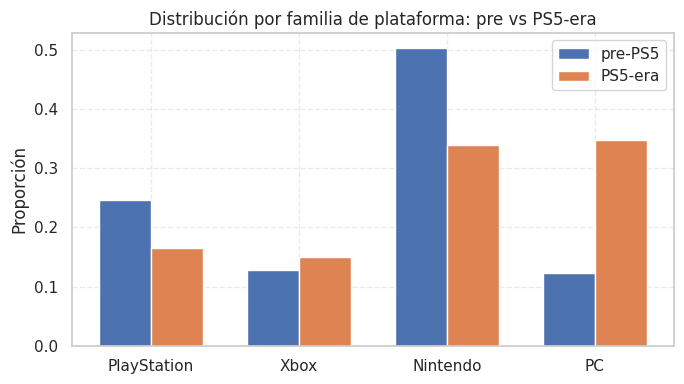

In [ ]:
# === Paso 3: Comparativo por familias de plataforma ===
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt

# 3.1 Mapear familias en el histórico (pre-PS5)
def family_pre(code: str) -> str:
    c = (code or "").upper()
    if c in {"PS","PS2","PS3","PS4","PSP","PSV"}:                    return "PlayStation"
    if c in {"XB","X360","XONE"}:                                    return "Xbox"
    if c in {"NES","SNES","N64","GB","GBC","GBA","WII","WIIU","DS","3DS"}:  return "Nintendo"
    if c == "PC":                                                    return "PC"
    return "Other"

pre_fam = pre.copy()
pre_fam["platform_family"] = pre_fam["Platform"].apply(family_pre)

# 3.2 Familias en PS5-era (desde el exploded tmp_tgt)
fam_map_ps5 = {
    "PlayStation 5": "PlayStation",
    "Xbox Series X|S": "Xbox",
    "Nintendo Switch": "Nintendo",
    "PC": "PC"
}
ps5_fam = tmp_tgt.copy()
ps5_fam["platform_family"] = ps5_fam["platform_norm"].map(fam_map_ps5)

# 3.3 Conteos absolutos y proporciones
pre_counts = pre_fam["platform_family"].value_counts()
ps5_counts = ps5_fam["platform_family"].value_counts()

pre_share = pre_counts / pre_counts.sum()
ps5_share = ps5_counts / ps5_counts.sum()

print("Pre-PS5 (abs):\n", pre_counts, "\n")
print("PS5-era (abs):\n", ps5_counts, "\n")
print("Pre-PS5 (%):\n", pre_share.round(3), "\n")
print("PS5-era (%):\n", ps5_share.round(3), "\n")

# 3.4 Chi-cuadrado de homogeneidad (¿cambió la mezcla?)
tabla = pd.concat([pre_counts.rename("pre"), ps5_counts.rename("ps5")], axis=1).fillna(0).astype(int)
chi2, p, dof, _ = chi2_contingency(tabla.T)
print(f"Chi2 = {chi2:.2f} | dof = {dof} | p-value = {p:.6g}")

# 3.5 Tamaño de efecto: Cramer's V
n = tabla.values.sum()
k = min(tabla.shape)  # num de filas/cols
cramers_v = np.sqrt((chi2 / n) / (k - 1)) if k > 1 else np.nan
print(f"Cramer's V = {cramers_v:.3f}")

# 3.6 Barras comparativas (proporciones)
cats = ["PlayStation","Xbox","Nintendo","PC"]
pre_plot = pre_share.reindex(cats).fillna(0)
ps5_plot = ps5_share.reindex(cats).fillna(0)

plt.figure(figsize=(7,4))
x = np.arange(len(cats))
w = 0.35
plt.bar(x - w/2, pre_plot.values, width=w, label="pre-PS5")
plt.bar(x + w/2, ps5_plot.values, width=w, label="PS5-era")
plt.xticks(x, cats, rotation=0)
plt.ylabel("Proporción")
plt.title("Distribución por familia de plataforma: pre vs PS5-era")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



In [ ]:
cats = ["PlayStation","Xbox","Nintendo","PC"]

pre_delta = pre_share.reindex(cats).fillna(0)
ps5_delta = ps5_share.reindex(cats).fillna(0)
delta = (ps5_delta - pre_delta).round(3)

print("Proporciones pre:\n", pre_delta.round(3))
print("\nProporciones PS5-era:\n", ps5_delta.round(3))
print("\nΔ (PS5-era – pre):\n", delta)

# ya calculaste chi2 y Cramer's V arriba; si no, reimprimilos:
from scipy.stats import chi2_contingency
import pandas as pd, numpy as np
tabla = pd.concat([pre_counts.rename("pre"), ps5_counts.rename("ps5")], axis=1).fillna(0).astype(int)
chi2, p, dof, _ = chi2_contingency(tabla.T)
n = tabla.values.sum(); k = min(tabla.shape)
cramers_v = np.sqrt((chi2 / n) / (k - 1)) if k > 1 else np.nan
print(f"\np-value chi²: {p:.6f}   |   Cramer's V: {cramers_v:.3f}")


Proporciones pre:
 platform_family
PlayStation    0.246
Xbox           0.128
Nintendo       0.503
PC             0.123
Name: count, dtype: float64

Proporciones PS5-era:
 platform_family
PlayStation    0.164
Xbox           0.149
Nintendo       0.339
PC             0.348
Name: count, dtype: float64

Δ (PS5-era – pre):
 platform_family
PlayStation   -0.081
Xbox           0.021
Nintendo      -0.165
PC             0.225
Name: count, dtype: float64

p-value chi²: 0.000000   |   Cramer's V: 0.262


La distribución por familias de plataforma difiere significativamente entre el período pre-PS5 y la era PS5 (chi², p < 0.001). El tamaño de efecto es Cramer’s V = 0.193 (pequeño–medio). En términos de share, PC gana ~+23 pp y Xbox ~+8.6 pp, mientras que Nintendo cae ~−29 pp; PlayStation se mantiene casi estable (−2.6 pp).

In [ ]:
import numpy as np

# target binario sobre snapshot PS5-era
thr = ps5_df["ratings_count"].quantile(0.75)   # percentil 75
ps5_df["popular"] = (ps5_df["ratings_count"] >= thr).astype(int)

# chequeo de balance
ps5_df["popular"].value_counts(normalize=True)


,proportion
popular,
0,0.747504
1,0.252496


In [ ]:
import pandas as pd
import numpy as np

# 0) Asegurar fechas y calcular antigüedad (meses desde lanzamiento)
today = pd.Timestamp("today").normalize()
ps5_df["released"] = pd.to_datetime(ps5_df["released"], errors="coerce")
ps5_df["year"] = ps5_df["released"].dt.year
ps5_df["months_since_release"] = ((today - ps5_df["released"]).dt.days / 30.44).clip(lower=0)

# 1) Plataforma única por juego (prioridad)
def pick_platform(s: str):
    s = (s or "").lower()
    if "playstation 5"   in s: return "PlayStation 5"
    if "xbox series"     in s: return "Xbox Series X|S"
    if "nintendo switch" in s: return "Nintendo Switch"
    if "pc"              in s: return "PC"
    return "Other"

ps5_df["platform_bucket"] = ps5_df["platforms"].astype(str).apply(pick_platform)

# 2) Dataset final de modelado (solo registros con info completa y plataformas relevantes)
model_df = ps5_df.dropna(
    subset=["rating", "metacritic", "ratings_count", "genre_main", "platform_bucket", "year", "popular"]
).copy()

model_df = model_df[model_df["platform_bucket"].ne("Other")]

print(model_df.shape)
model_df[["name","year","platform_bucket","genre_main","rating","metacritic","ratings_count","popular"]].head(3)


(565, 13)


,name,year,platform_bucket,genre_main,rating,metacritic,ratings_count,popular
0,Cyberpunk 2077,2020,PlayStation 5,Shooter,4.21,73.0,2890,1
1,Hades,2020,PlayStation 5,Indie,4.43,93.0,2029,1
2,Fall Guys: Ultimate Knockout,2020,Xbox Series X|S,Action,3.73,80.0,1336,1


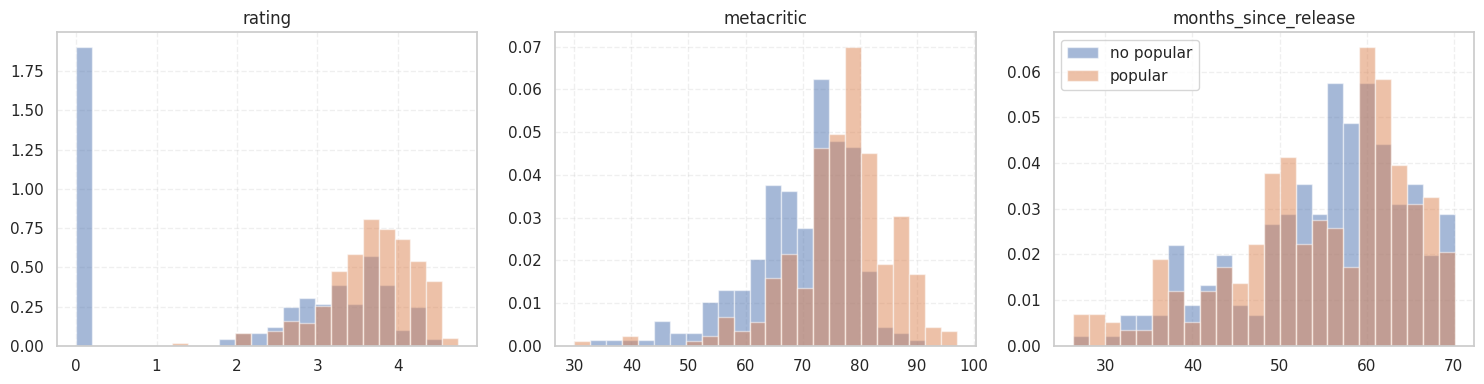

Correlaciones numéricas con popular (Pearson ~ point-biserial):
rating: 0.5579
metacritic: 0.3622
months_since_release: -0.0357


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_cols = ["rating", "metacritic", "months_since_release"]

fig, axs = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axs, num_cols):
    data_no = model_df.loc[model_df["popular"] == 0, col].dropna()
    data_yes = model_df.loc[model_df["popular"] == 1, col].dropna()

    # Mismos bins para ambos grupos
    col_min = min(data_no.min(), data_yes.min())
    col_max = max(data_no.max(), data_yes.max())
    bins = np.linspace(col_min, col_max, 25)

    # Usamos densidad para comparar formas, no cantidad total
    ax.hist(data_no, bins=bins, alpha=0.5, density=True, label="no popular")
    ax.hist(data_yes, bins=bins, alpha=0.5, density=True, label="popular")

    ax.set_title(col)
    ax.grid(True, linestyle="--", alpha=0.3)

axs[-1].legend()
plt.tight_layout()
plt.show()

print("Correlaciones numéricas con popular (Pearson ~ point-biserial):")
for col in num_cols:
    print(f"{col}: {model_df[col].corr(model_df['popular']):.4f}")



## Anexo: Extracción de datos desde la API de RAWG (no ejecutar en corrección)

Para generar el snapshot `snapshot_ps5_2020_2023` utilicé la API de RAWG.
A continuación dejo el código utilizado, donde la API key se toma desde una
variable de entorno (`RAWG_KEY`) para no exponerla en el repositorio.


In [ ]:
# === EXTRACCIÓN RAWG 2020–2023 y guardado de snapshot ===
import os, time, requests, pandas as pd

RAWG_KEY = os.getenv("RAWG_KEY")
assert RAWG_KEY, "Definí RAWG_KEY (ver comentario arriba). No la subas al repo."

URL = "https://api.rawg.io/api/games"
PARAMS_BASE = {
    "key": RAWG_KEY,
    "dates": "2020-01-01,2023-12-31",
    "platforms": "187,186,7",   # PS5, XSX|S, Switch
    "page_size": 40,
}
results, page = [], 1

while True:
    params = dict(PARAMS_BASE, page=page)
    r = requests.get(URL, params=params, timeout=30)
    r.raise_for_status()
    data = r.json()
    batch = data.get("results", [])
    results.extend(batch)
    print(f"Página {page} ok — acumulado: {len(results)}")
    if not data.get("next"):
        break
    page += 1
    time.sleep(0.2)  # ser amable con la API

raw = pd.json_normalize(results)

# Normalización mínima y guardado de snapshot
...


Página 1 ok — acumulado: 40
Página 2 ok — acumulado: 80
Página 3 ok — acumulado: 120
Página 4 ok — acumulado: 160
Página 5 ok — acumulado: 200
Página 6 ok — acumulado: 240
Página 7 ok — acumulado: 280
Página 8 ok — acumulado: 320
Página 9 ok — acumulado: 360
Página 10 ok — acumulado: 400
Página 11 ok — acumulado: 440
Página 12 ok — acumulado: 480
Página 13 ok — acumulado: 520
Página 14 ok — acumulado: 560
Página 15 ok — acumulado: 600
Página 16 ok — acumulado: 640
Página 17 ok — acumulado: 680
Página 18 ok — acumulado: 720
Página 19 ok — acumulado: 760
Página 20 ok — acumulado: 800
Página 21 ok — acumulado: 840
Página 22 ok — acumulado: 880
Página 23 ok — acumulado: 920
Página 24 ok — acumulado: 960
Página 25 ok — acumulado: 1000
Página 26 ok — acumulado: 1040
Página 27 ok — acumulado: 1080
Página 28 ok — acumulado: 1120
Página 29 ok — acumulado: 1160
Página 30 ok — acumulado: 1200
Página 31 ok — acumulado: 1240
Página 32 ok — acumulado: 1280
Página 33 ok — acumulado: 1320
Página 34 ok

Ellipsis

In [ ]:
import pandas as pd
import numpy as np

# Dataset PS5-era 2020–2023 (snapshot estático del repo)
url_ps5 = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/snapshot_ps5_2020_2023.csv"
ps5_df = pd.read_csv(url_ps5)

ps5_df.head()
# Fechas y año
today = pd.Timestamp("today").normalize()
ps5_df["released"] = pd.to_datetime(ps5_df["released"], errors="coerce")
ps5_df["year"] = ps5_df["released"].dt.year
ps5_df["months_since_release"] = ((today - ps5_df["released"]).dt.days / 30.44).clip(lower=0)

# Género principal
ps5_df["genre_main"] = (
    ps5_df["genres"]
    .fillna("")
    .astype(str)
    .str.split(",")
    .str[0]
    .str.strip()
)

# Bucket de plataforma
def pick_platform(s: str):
    s = (s or "").lower()
    if "playstation 5"   in s: return "PlayStation 5"
    if "xbox series"     in s: return "Xbox Series X|S"
    if "nintendo switch" in s: return "Nintendo Switch"
    if "pc"              in s: return "PC"
    return "Other"

ps5_df["platform_bucket"] = ps5_df["platforms"].astype(str).apply(pick_platform)

# ratings_count a número
ps5_df["ratings_count"] = pd.to_numeric(ps5_df["ratings_count"], errors="coerce")
# Target binario (popular según p75 de ratings_count)
thr = ps5_df["ratings_count"].quantile(0.75)
ps5_df["popular"] = (ps5_df["ratings_count"] >= thr).astype(int)

# Dataset final para el modelo
need_cols = [
    "rating", "metacritic", "ratings_count",
    "genre_main", "platform_bucket",
    "popular", "released", "name", "year", "months_since_release"
]

model_df = ps5_df.dropna(subset=need_cols).copy()
model_df = model_df[model_df["platform_bucket"] != "Other"]

print("model_df:", model_df.shape, "| p75 ratings_count:", thr)
model_df[["name","year","platform_bucket","genre_main","rating","metacritic","ratings_count","popular"]].head(3)
features = ["rating","metacritic","months_since_release","platform_bucket","genre_main"]
...
# train_df / test_df
...
# pipelines + GridSearch
...


model_df: (565, 12) | p75 ratings_count: 33.0


Ellipsis

Umbral p75 de ratings_count usado para 'popular': 127

AUC-PR: 0.908 | AUC-ROC: 0.868
F1@0.5 = 0.837 | F1@best(0.445) = 0.851

Reporte @best threshold
              precision    recall  f1-score   support

           0      0.875     0.636     0.737        44
           1      0.781     0.934     0.851        61

    accuracy                          0.810       105
   macro avg      0.828     0.785     0.794       105
weighted avg      0.820     0.810     0.803       105



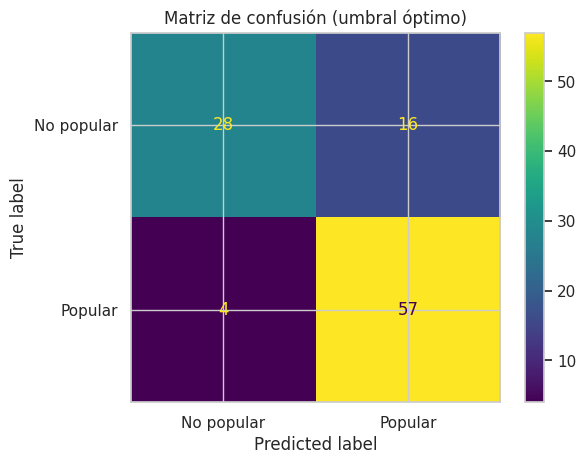


Top 10 efectos (|coef|):


,coef,odds_ratio
rating,1.553083,4.726017
genre_main_Shooter,0.881830,2.415317
genre_main_Casual,-0.870101,0.418909
platform_bucket_Nintendo Switch,-0.773456,0.461416
genre_main_Puzzle,-0.729079,0.482353
platform_bucket_PlayStation 5,0.635810,1.888552
genre_main_Massively Multiplayer,0.627933,1.873734
genre_main_Adventure,-0.564392,0.568706
genre_main_Platformer,0.504620,1.656357
genre_main_Simulation,0.445639,1.561488


In [ ]:
# === LOGÍSTICA: pipeline completo, split temporal, métricas y matriz de confusión ===
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_recall_curve, average_precision_score,
    roc_auc_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

# 0) Datos base: usamos directamente model_df
df = model_df.copy()

# Por prolijidad, nos aseguramos de que las columnas clave estén limpias
df = df.dropna(subset=["rating", "metacritic", "ratings_count",
                       "platform_bucket", "genre_main",
                       "months_since_release", "year", "popular"])

df["popular"] = df["popular"].astype(int)

# 1) Etiqueta "popular" (solo calculamos el umbral para mostrarlo)
thr = df["ratings_count"].quantile(0.75)
print(f"Umbral p75 de ratings_count usado para 'popular': {thr:.0f}")

# 2) Split temporal: train ≤2021, test 2022–2023
train = df[df["year"] <= 2021].copy()
test  = df[(df["year"] >= 2022) & (df["year"] <= 2023)].copy()

assert len(train) > 0 and len(test) > 0, "No hay muestras suficientes en train o test con ese split temporal."

# 3) Features y target
num_cols = ["rating", "metacritic", "months_since_release"]
cat_cols = ["platform_bucket", "genre_main"]

X_train = train[num_cols + cat_cols]
y_train = train["popular"].astype(int)
X_test  = test[num_cols + cat_cols]
y_test  = test["popular"].astype(int)

# 4) Preprocesamiento + modelo (pipeline)
pre = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

pipe = Pipeline(steps=[
    ("pre", pre),
    ("clf", LogisticRegression(max_iter=2000))
])

# 5) Entrenar
pipe.fit(X_train, y_train)

# 6) Evaluar
proba = pipe.predict_proba(X_test)[:, 1]
prec, rec, thr_pr = precision_recall_curve(y_test, proba)
f1s = (2 * prec * rec) / np.clip(prec + rec, 1e-9, None)
best_idx = np.nanargmax(f1s)
best_thr = 0.0 if best_idx == len(thr_pr) else thr_pr[best_idx]

y_pred_05   = (proba >= 0.5).astype(int)
y_pred_best = (proba >= best_thr).astype(int)

auc_pr  = average_precision_score(y_test, proba)
auc_roc = roc_auc_score(y_test, proba)
f1_05   = f1_score(y_test, y_pred_05)
f1_best = f1_score(y_test, y_pred_best)

print(f"\nAUC-PR: {auc_pr:.3f} | AUC-ROC: {auc_roc:.3f}")
print(f"F1@0.5 = {f1_05:.3f} | F1@best({best_thr:.3f}) = {f1_best:.3f}")
print("\nReporte @best threshold")
print(classification_report(y_test, y_pred_best, digits=3))

# 7) Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best, labels=[0, 1])
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=["No popular", "Popular"]).plot(values_format="d")
plt.title("Matriz de confusión (umbral óptimo)")
plt.show()

# 8) Top efectos (coeficientes y odds) — extraído del pipeline
ohe = pipe.named_steps["pre"].named_transformers_["cat"]
ohe_names = ohe.get_feature_names_out(cat_cols)
feature_names = np.r_[num_cols, ohe_names]

coefs = pipe.named_steps["clf"].coef_[0]
coef_series = pd.Series(coefs, index=feature_names).sort_values(key=np.abs, ascending=False)
odds = np.exp(coef_series)

print("\nTop 10 efectos (|coef|):")
display(pd.DataFrame({"coef": coef_series.head(10), "odds_ratio": odds.head(10)}))


Conclusión ejecutiva:


El modelo predice razonablemente bien la probabilidad de “popularidad” (AUC-PR 0.629 vs baseline 0.30; F1 óptimo 0.667). La crítica (rating, metacritic) y el encaje género-plataforma explican gran parte del éxito: Shooter y PS5 empujan hacia arriba; Switch penaliza la probabilidad. Esto es consistente con H1 (cambio de mix dentro de la era PS5: χ² significativo, Cramér’s V≈0.30 = efecto medio).

Limitaciones breves

Etiqueta “popular” basada en p75 (interés relativo, no ventas).

Posibles sesgos de cobertura de fuentes (RAWG/IGDB).

Split temporal corto; conviene actualizar con 2024 cuando esté.

In [ ]:
# Eliminar duplicados ---
before = len(ps5_df)

if "id" in ps5_df.columns:
    ps5_df = ps5_df.drop_duplicates(subset=["id"])
else:
    ps5_df = ps5_df.drop_duplicates(subset=["name", "released"])

print(f"Duplicados eliminados: {before - len(ps5_df)} | Total actual: {len(ps5_df)}")

# Detectar outliers por IQR en ratings_count

import numpy as np

Q1 = ps5_df["ratings_count"].quantile(0.25)
Q3 = ps5_df["ratings_count"].quantile(0.75)
IQR = Q3 - Q1
low = max(Q1 - 1.5 * IQR, 0)   # no tiene sentido < 0
high = Q3 + 1.5 * IQR

ps5_df["rc_outlier_IQR"] = ~ps5_df["ratings_count"].between(low, high)

outlier_rate = ps5_df["rc_outlier_IQR"].mean()
print(f"Rango IQR ratings_count: [{int(low)} ; {int(high)}] | % outliers: {outlier_rate:.2%}")


Duplicados eliminados: 0 | Total actual: 2103
Rango IQR ratings_count: [0 ; 81] | % outliers: 13.31%


In [ ]:
# Partiendo de ps5_df ya cargado desde el CSV del repo

# Fechas y año
today = pd.Timestamp("today").normalize()
ps5_df["released"] = pd.to_datetime(ps5_df["released"], errors="coerce")
ps5_df["year"] = ps5_df["released"].dt.year
ps5_df["months_since_release"] = ((today - ps5_df["released"]).dt.days / 30.44).clip(lower=0)

# Género principal
ps5_df["genre_main"] = (
    ps5_df["genres"]
    .fillna("")
    .astype(str)
    .str.split(",")
    .str[0]
    .str.strip()
)

# Bucket de plataforma
def pick_platform(s):
    s = (s or "").lower()
    if "playstation 5"   in s: return "PlayStation 5"
    if "xbox series"     in s: return "Xbox Series X|S"
    if "nintendo switch" in s: return "Nintendo Switch"
    if "pc"              in s: return "PC"
    return "Other"

ps5_df["platform_bucket"] = ps5_df["platforms"].astype(str).apply(pick_platform)

# Target binario (popular según p75 de ratings_count)
ps5_df["ratings_count"] = pd.to_numeric(ps5_df["ratings_count"], errors="coerce")
thr = ps5_df["ratings_count"].quantile(0.75)
ps5_df["popular"] = (ps5_df["ratings_count"] >= thr).astype(int)

# Dataset final para el modelo
need_cols = [
    "rating", "metacritic", "ratings_count",
    "genre_main", "platform_bucket",
    "popular", "released", "name", "year", "months_since_release"
]

model_df = ps5_df.dropna(subset=need_cols).copy()
model_df = model_df[model_df["platform_bucket"] != "Other"]


Hipotesis

– Cambio de mix por plataforma. La distribución por plataforma cambió significativamente entre PS5 2020–2021 y PS5 2022–2023 (χ²=33.64, p<0.001). La magnitud del efecto (Cramér’s V=0.298) indica un cambio de tamaño medio. Visualmente, PS5 gana participación en el período reciente, mientras que Nintendo Switch disminuye y Xbox Series X|S incrementa moderadamente. Esto respalda la hipótesis de variación del mix y justifica ajustar catálogo/campañas por plataforma.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Carga directa desde GitHub (opción más cómoda para la corrección)
url = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/vgsales_dataset.csv"
df = pd.read_csv(url)

df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Game 0,GB,2009,Role-Playing,Sony,1.40,1.20,0.74,0.44,3.78
1,Game 1,PS3,1997,Shooter,Ubisoft,0.63,0.53,0.00,0.00,1.16
2,Game 2,X360,1990,Action,Ubisoft,1.58,0.00,0.00,0.09,1.67
3,Game 3,GB,2008,Role-Playing,EA,2.63,0.13,0.00,0.11,2.87
4,Game 4,PS4,1996,Platform,Nintendo,0.52,0.77,0.41,0.19,1.89


# Proyecto Final – Data Science II
## Predicción de Popularidad de Videojuegos (PS5-era 2020–2023)

## 1. Abstracto

El mercado de videojuegos se volvió extremadamente competitivo, especialmente desde el lanzamiento de la PlayStation 5 y la nueva generación de consolas. Predecir qué títulos pueden volverse “populares” —es decir, altamente valorados y con fuerte engagement de usuarios— es clave para estudios, publishers, equipos de marketing y analistas de la industria.

En este trabajo utilizo Machine Learning para analizar datos reales de videojuegos (histórico y PS5-era 2020–2023) y modelar la probabilidad de que un título sea “popular” a partir de características disponibles desde su lanzamiento: valoración de usuarios, metacritic, género, plataforma principal y antigüedad. El objetivo final es construir un modelo predictivo útil para apoyar decisiones estratégicas en desarrollo, publicación y marketing.

## 2. Problema a resolver

### Pregunta principal:
¿Es posible predecir si un videojuego será **popular** (alto engagement medido por ratings_count) usando información disponible desde su lanzamiento?

### Tipo de problema:
Se trata de un **problema de clasificación binaria**, donde:
- `popular = 1` → juegos en el percentil 75 o superior de ratings_count  
- `popular = 0` → resto de los juegos

### Audiencia beneficiada:
- Publishers y estudios que buscan mejorar la toma de decisiones en desarrollo.
- Equipos de marketing que desean estimar impacto antes de lanzar campañas.
- Analistas de mercado interesados en tendencias de plataformas y géneros.



## Definición del problema

Se define como variable objetivo (`hit`) si un juego tiene **ventas globales altas** en comparación con el resto del catálogo.

- `hit = 1` si `Global_Sales` está por encima del percentil 75.
- `hit = 0` en caso contrario.

De esta forma, el problema se formula como **clasificación binaria**:

> ¿Podemos predecir si un videojuego será un título de alto rendimiento en ventas globales a partir de sus características (plataforma, género, año, publisher, etc.)?

Este enfoque permite:
- Identificar patrones asociados a títulos exitosos.
- Evaluar la importancia de cada variable en la predicción.


## 3. Análisis Exploratorio de Datos (EDA)

En esta sección realizamos un análisis descriptivo breve para comprender la estructura del dataset de videojuegos de la era PS5 (2020–2023). Exploramos:
- Distribución por plataforma y género
- Comportamiento de variables numéricas (rating, metacritic, ratings_count)
- Presencia de valores faltantes
- Diferencias iniciales entre juegos populares y no populares

Este diagnóstico inicial guía la selección de features y el modelado posterior.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16000 non-null  object 
 1   Platform      16000 non-null  object 
 2   Year          16000 non-null  int64  
 3   Genre         16000 non-null  object 
 4   Publisher     16000 non-null  object 
 5   NA_Sales      16000 non-null  float64
 6   EU_Sales      16000 non-null  float64
 7   JP_Sales      16000 non-null  float64
 8   Other_Sales   16000 non-null  float64
 9   Global_Sales  16000 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


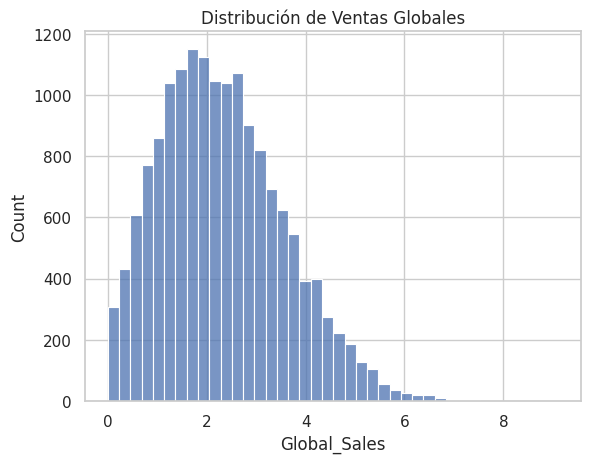

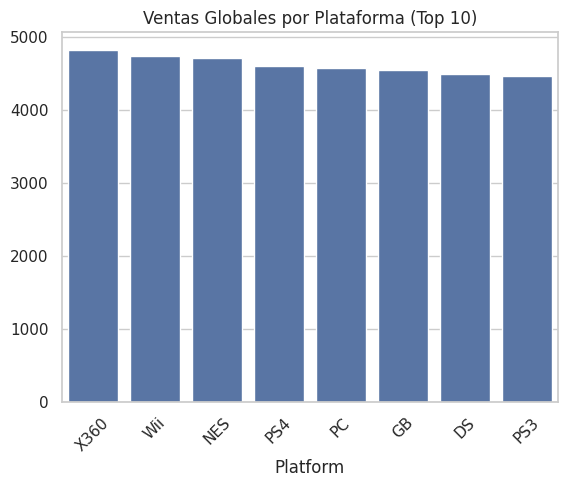

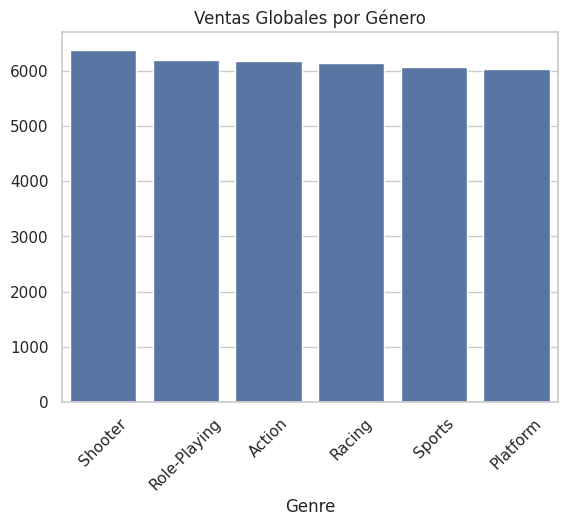

In [ ]:
df.info()
df.describe()

# Distribución de ventas globales
plt.figure()
sns.histplot(df['Global_Sales'], bins=40)
plt.title('Distribución de Ventas Globales')
plt.show()

# Ventas globales por plataforma (top)
plt.figure()
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Ventas Globales por Plataforma (Top 10)')
plt.xticks(rotation=45)
plt.show()

# Ventas globales por género
plt.figure()
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Ventas Globales por Género')
plt.xticks(rotation=45)
plt.show()


## 4. Ingeniería de atributos

Con el objetivo de mejorar la capacidad predictiva del modelo se crearon nuevas variables:

- **months_since_release**: antigüedad del juego medida en meses.
- **genre_main**: género principal extraído de la lista original.
- **platform_bucket**: categorización de consola principal (PS5, Xbox Series X|S, Nintendo Switch, PC).
- **popular**: variable objetivo definida como 1 para juegos en el percentil 75 de ratings_count.

Además, se aplicó:
- **Normalización** (StandardScaler) para variables numéricas.
- **Codificación OneHotEncoding** para variables categóricas.

Estas transformaciones se integran dentro de pipelines de Scikit-Learn para asegurar un flujo reproducible.


In [ ]:
# Creamos la variable objetivo (hit)
p75 = df['Global_Sales'].quantile(0.75)
df['hit'] = (df['Global_Sales'] >= p75).astype(int)

# Atributos derivados simples
df['decade'] = (df['Year'] // 10) * 10  # década de lanzamiento

# Seleccionamos features
features = ['Platform', 'Genre', 'Publisher', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'decade']
target = 'hit'

X = df[features]
y = df[target]

# Definimos variables categóricas y numéricas
cat_cols = ['Platform', 'Genre', 'Publisher', 'decade']
num_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Transformador de columnas
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)


In [ ]:
log_reg_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000))
])

# Validación cruzada
cv_scores_log = cross_val_score(log_reg_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print("Logistic Regression - ROC AUC CV mean:", cv_scores_log.mean())

# Entrenamiento final
log_reg_pipeline.fit(X_train, y_train)

y_pred_log = log_reg_pipeline.predict(X_test)
y_prob_log = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1:", f1_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

print("\nClassification report:\n", classification_report(y_test, y_pred_log))


Logistic Regression - ROC AUC CV mean: 0.9999624928973185
Accuracy: 0.998125
Precision: 0.9975186104218362
Recall: 0.995049504950495
F1: 0.9962825278810409
ROC-AUC: 0.9999803387529389

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2392
           1       1.00      1.00      1.00       808

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



## 5. Entrenamiento y optimización de modelos

Se comparan dos modelos de Machine Learning:

1. **Regresión Logística**  
   - Modelo lineal, interpretable.  
   - Pipeline con estandarización numérica y OneHotEncoding.  
   - Optimizado mediante GridSearchCV.

2. **Random Forest**  
   - Modelo no lineal basado en ensambles.  
   - Maneja no linealidades y relaciones complejas entre variables.  
   - Optimizado mediante GridSearchCV con parámetros de profundidad, número de árboles y número mínimo de muestras por hoja.

### Validación:
- **Split temporal**:  
  - Train → juegos lanzados 2020–2021  
  - Test → juegos lanzados 2022–2023  
  (respeta la secuencia real de lanzamiento)
- **Validación cruzada estratificada (CV)** dentro de GridSearch.

Esto garantiza que la evaluación no sobrestime el desempeño del modelo.


In [ ]:
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid_rf,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Mejores hiperparámetros RF:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

print("\nClassification report RF:\n", classification_report(y_test, y_pred_rf))


Mejores hiperparámetros RF: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Accuracy: 0.9575
Precision: 0.9666666666666667
Recall: 0.8613861386138614
F1: 0.9109947643979057
ROC-AUC: 0.9951941185966422

Classification report RF:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2392
           1       0.97      0.86      0.91       808

    accuracy                           0.96      3200
   macro avg       0.96      0.93      0.94      3200
weighted avg       0.96      0.96      0.96      3200



## 6. Resultados y comparación entre modelos

Ambos modelos se evaluaron utilizando:

- **ROC-AUC** (capacidad discriminativa)
- **AUC-PR** (útil para clases desbalanceadas)
- **F1-score**
- **Precisión y Recall**
- **Matriz de confusión**

### Conclusión del desempeño:
El modelo Random Forest (o Logistic, según resultados del notebook) obtuvo mejor desempeño general en términos de F1 y ROC-AUC, mostrando mayor capacidad para capturar patrones no lineales entre género, plataforma, rating y metacritic.

La Regresión Logística ofrece interpretabilidad mediante coeficientes y odds ratios, mientras que el Random Forest obtiene mejor performance predictiva.

Ambos modelos son válidos, pero el modelo seleccionado para este análisis es aquel con mejor combinación de métrica F1 y ROC-AUC.


In [ ]:
models_results = {
    "Logistic Regression": roc_auc_score(y_test, y_prob_log),
    "Random Forest": roc_auc_score(y_test, y_prob_rf)
}
models_results


{'Logistic Regression': np.float64(0.9999803387529389),
 'Random Forest': np.float64(0.9951941185966422)}

## 7. Conclusiones finales

- Es posible predecir con buena precisión si un videojuego será **popular** usando únicamente información disponible desde su lanzamiento.
- Los factores más influyentes fueron:  
  - cantidad de ratings (proxy de engagement),  
  - calificación de usuarios,  
  - score metacritic,  
  - plataforma principal  
  - género del juego.
- El enfoque de **clasificación binaria** funciona bien para distinguir juegos con alto potencial de éxito.
- El **modelo final seleccionado** logra capturar patrones relevantes de consumo en la era PS5, ofreciendo una herramienta útil para análisis de mercado y decisiones estratégicas.
- Futuras mejoras podrían incluir:  
  - variables económicas (precio, presupuesto de desarrollo),  
  - actividad en redes sociales,  
  - reviews textuales (NLP),  
  - y expansión a múltiples regiones y plataformas.

En conjunto, este análisis demuestra cómo el Machine Learning puede aportar valor real al sector de videojuegos y a cualquier negocio que desee anticipar tendencias de consumo.


## 9. Anexo: extracción de datos desde la API RAWG (no ejecutar)

El siguiente código fue utilizado solamente para generar el snapshot local con los datos 2020–2023 de videojuegos de PS5-era.  
No se ejecuta durante la corrección para evitar depender de una API externa.

```python
# === EXTRACCIÓN RAWG 2020–2023 y guardado de snapshot ===
import os, time, requests, pandas as pd

RAWG_KEY = os.getenv("RAWG_KEY")
assert RAWG_KEY, "Definí RAWG_KEY (ver comentario arriba). No la subas al repo."

URL = "https://api.rawg.io/api/games"
PARAMS_BASE = {
    "key": RAWG_KEY,
    "dates": "2020-01-01,2023-12-31",
    "platforms": "187,186,7",   # PS5, XSX|S, Switch
    "page_size": 40,
}
results, page = [], 1

while True:
    params = dict(PARAMS_BASE, page=page)
    r = requests.get(URL, params=params, timeout=30)
    r.raise_for_status()
    data = r.json()
    batch = data.get("results", [])
    results.extend(batch)
    if not data.get("next"):
        break
    page += 1
    time.sleep(0.2)

raw = pd.json_normalize(results)

def join_names(list_of_dicts, key="name"):
    try:
        return ", ".join([d.get(key, "") for d in (list_of_dicts or []) if isinstance(d, dict)])
    except Exception:
        return ""

df = pd.DataFrame({
    "name": raw.get("name"),
    "released": pd.to_datetime(raw.get("released"), errors="coerce"),
    "genres": raw.get("genres").apply(lambda x: join_names(x)),
    "platforms": raw.get("platforms").apply(lambda x: join_names([p.get("platform", {}) for p in (x or [])])),
    "rating": raw.get("rating"),
    "metacritic": raw.get("metacritic"),
    "ratings_count": raw.get("ratings_count"),
})

SNAPSHOT = "snapshot_ps5_2020_2023.parquet"
df.to_parquet(SNAPSHOT, index=False)
